In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as ss
import numpy as np
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 35
pd.options.display.max_columns = 35

df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# Exploratory Data Analysis

### Dataset Summary

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

### Feature dimensions

In [3]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days:Policy-Accident        5
Days:Policy-Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange-Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
FraudFound                  2
dtype: int

### Checking for missing values

In [4]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

##### Based on the statistics above, there are no missing values in the dataset

### Fraud Ratio

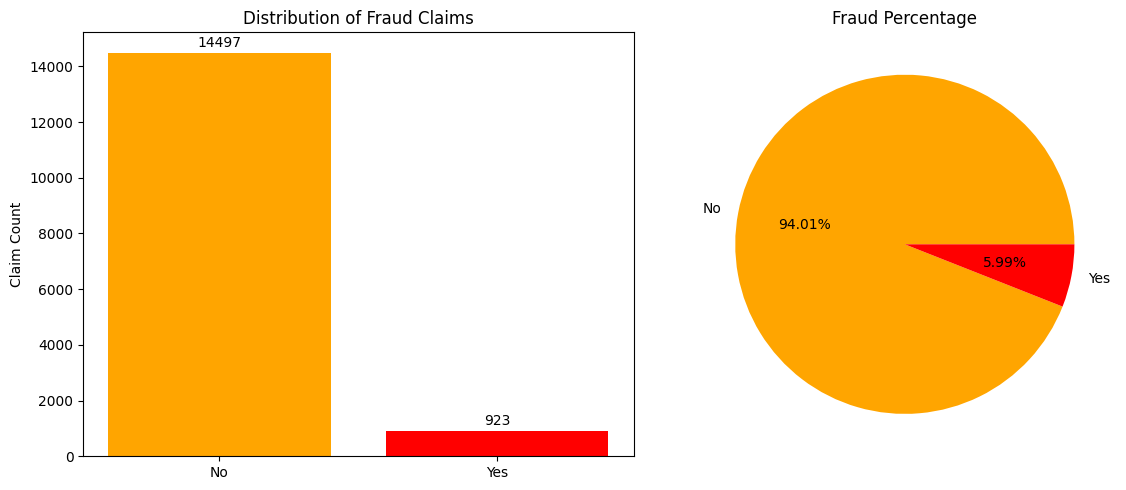

In [5]:

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

fraud_counts = df["FraudFound"].value_counts()
ax[0].bar(fraud_counts.index, fraud_counts.values, color=["orange", "red"])
ax[0].set_ylabel("Claim Count")
ax[0].set_title("Distribution of Fraud Claims")

# Annotate the bar heights with their counts
for p in ax[0].patches:
    ax[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 100), ha='center', va='bottom', fontsize=10, color='black')

# Plot the pie chart for the percentage of fraud and no fraud
fraud_percentage = df["FraudFound"].value_counts(normalize=True)
ax[1].pie(fraud_percentage, labels=fraud_percentage.index, autopct='%.2f%%', colors=["orange", "red"])
ax[1].set_title("Fraud Percentage")

plt.tight_layout()
plt.show()


In [6]:
ratio_of_fraud_vs_nonfraud = len(df[df['FraudFound'] == 'Yes']) / len(df[df['FraudFound'] == 'No'])
ratio_of_fraud_vs_nonfraud

0.06366834517486376

The ratio of fraud vs non-fraud transactions is 0.06366834517486376.

### Check duplicate rows

In [7]:
df.duplicated().sum()

0

##### There are no duplcated rows in the dataset

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Distribution Plots

array([[<Axes: title={'center': 'WeekOfMonth'}>,
        <Axes: title={'center': 'WeekOfMonthClaimed'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PolicyNumber'}>],
       [<Axes: title={'center': 'RepNumber'}>,
        <Axes: title={'center': 'Deductible'}>,
        <Axes: title={'center': 'DriverRating'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

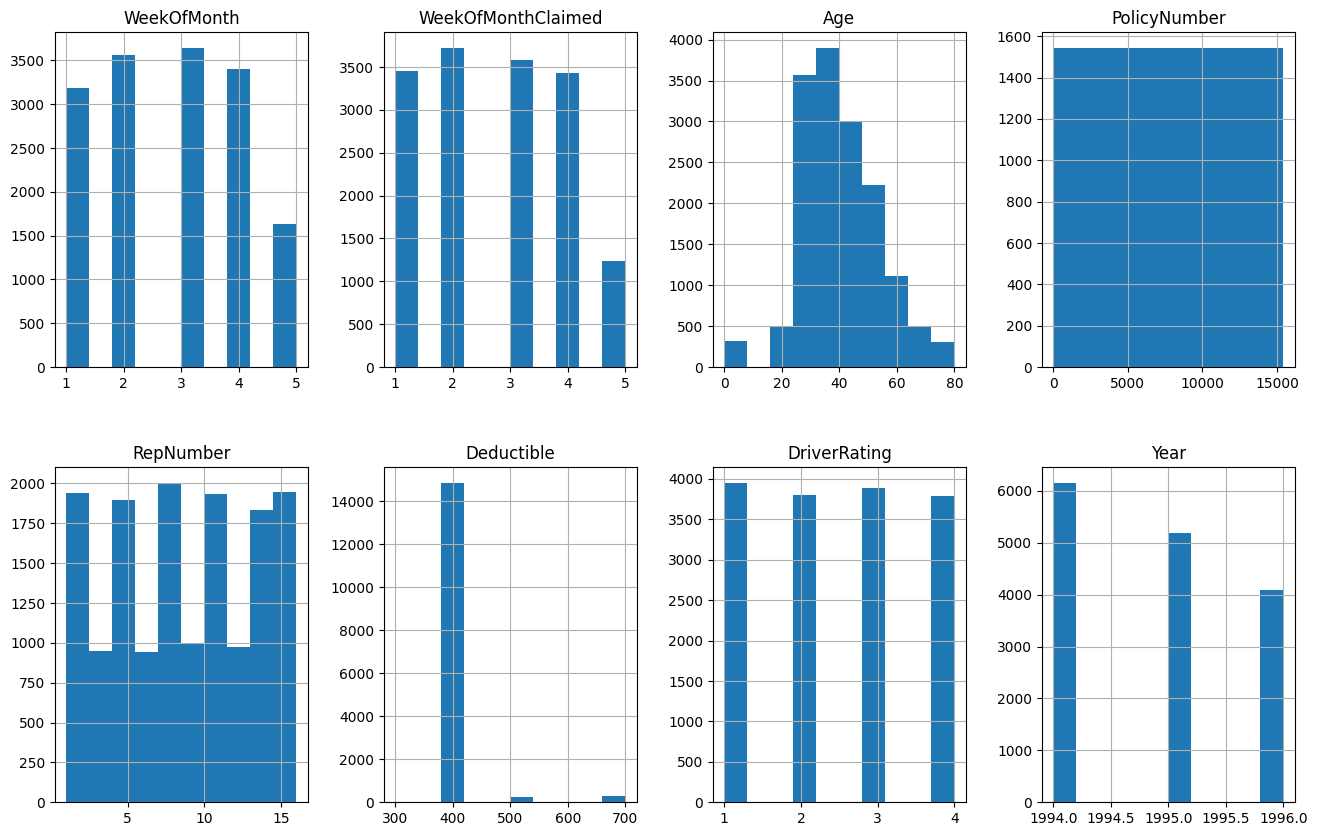

In [9]:
fig, axis = plt.subplots(2, 4, figsize=(16, 10))
df.hist(ax = axis)

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

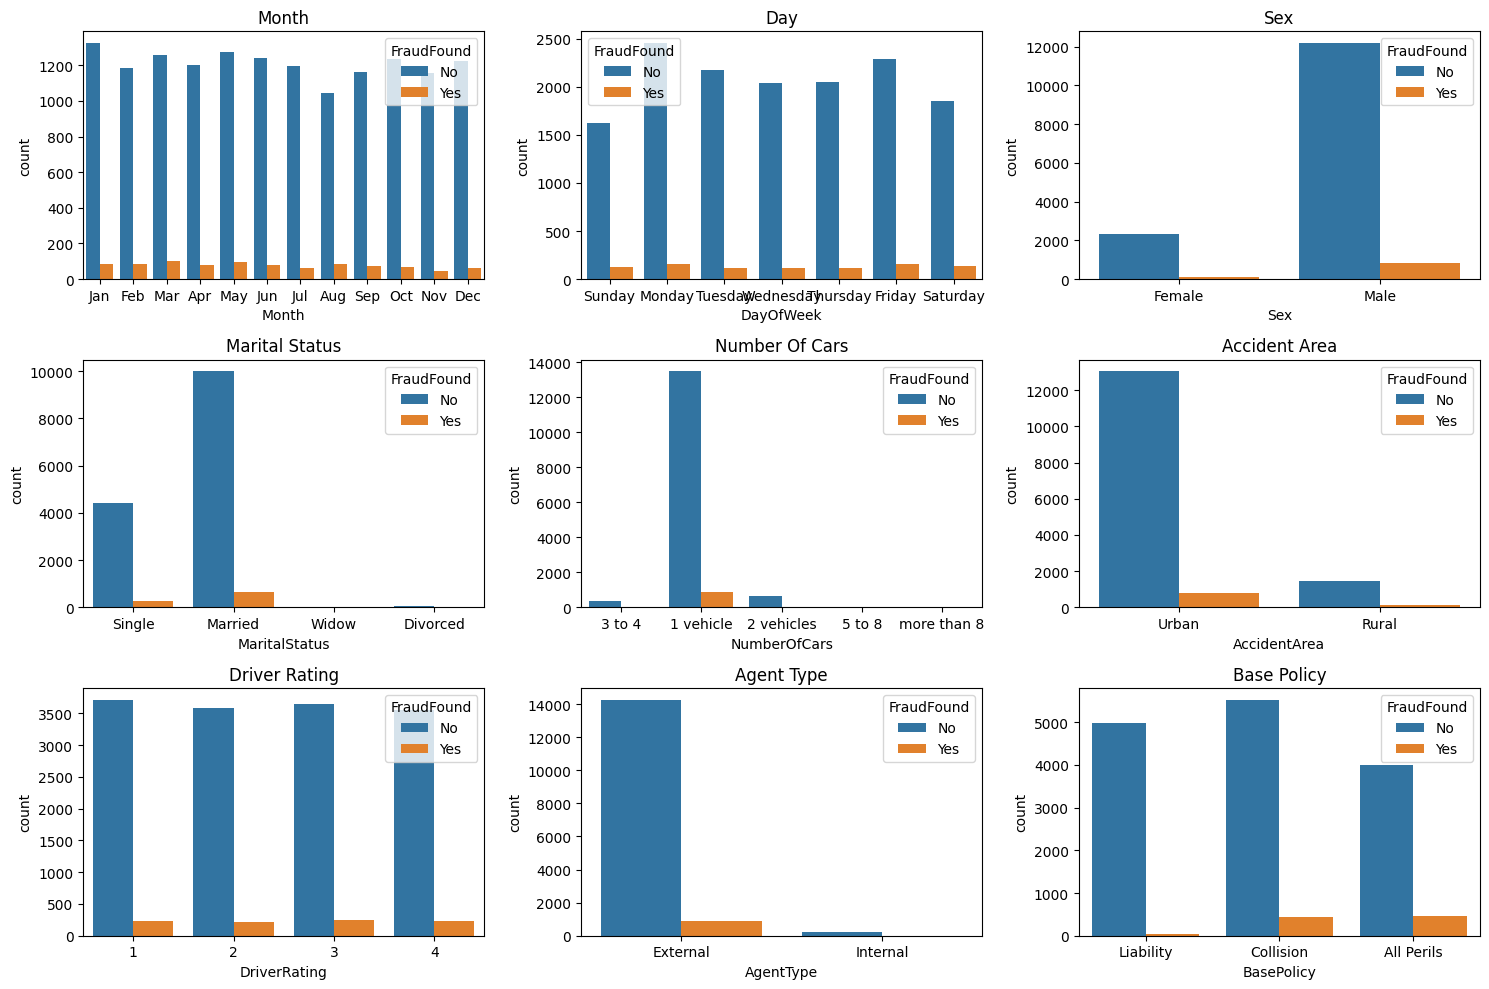

In [10]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='Month', hue='FraudFound', order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ax=ax[0][0])
ax[0][0].set_title('Month')

sns.countplot(data=df, x='DayOfWeek', hue='FraudFound', order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ax=ax[0][1])
ax[0][1].set_title('Day')

sns.countplot(data=df, x='Sex', hue='FraudFound', ax=ax[0][2])
ax[0][2].set_title('Sex')

sns.countplot(data=df, x='MaritalStatus', hue='FraudFound', ax=ax[1][0])
ax[1][0].set_title('Marital Status')

sns.countplot(data=df, x='NumberOfCars', hue='FraudFound', ax=ax[1][1])
ax[1][1].set_title('Number Of Cars')

sns.countplot(data=df, x='AccidentArea', hue='FraudFound', ax=ax[1][2])
ax[1][2].set_title('Accident Area')

sns.countplot(data=df, x='DriverRating', hue='FraudFound', ax=ax[2][0])
ax[2][0].set_title('Driver Rating')

sns.countplot(data=df, x='AgentType', hue='FraudFound', ax=ax[2][1])
ax[2][1].set_title('Agent Type')

sns.countplot(data=df, x='BasePolicy', hue='FraudFound', ax=ax[2][2])
ax[2][2].set_title('Base Policy')


plt.tight_layout()

##### Converting Yes and No values of "FraudFound" to 1 and 0 respectively

In [11]:
df["FraudFound"] = df["FraudFound"].replace('No', 0)
df["FraudFound"] = df["FraudFound"].replace('Yes', 1)


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

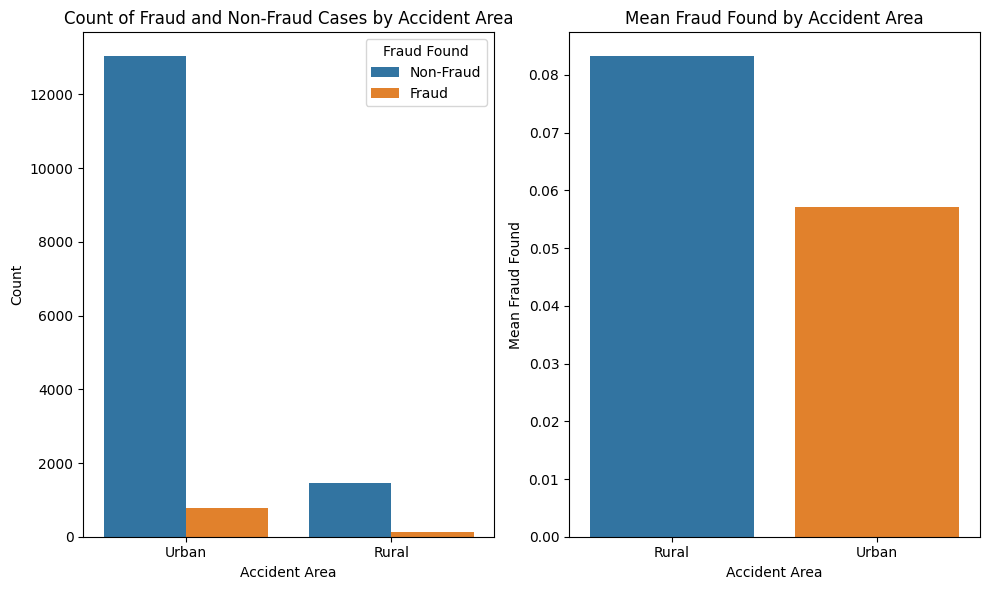

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))


sns.countplot(x='AccidentArea', hue='FraudFound', data=df, ax=ax[0])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Accident Area')
ax[0].set_xlabel('Accident Area')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])


area_fraud = df.groupby('AccidentArea')['FraudFound'].mean()
sns.barplot(x=area_fraud.index, y=area_fraud.values, ax=ax[1])
ax[1].set_title('Mean Fraud Found by Accident Area')
ax[1].set_xlabel('Accident Area')
ax[1].set_ylabel('Mean Fraud Found')



plt.tight_layout()



C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

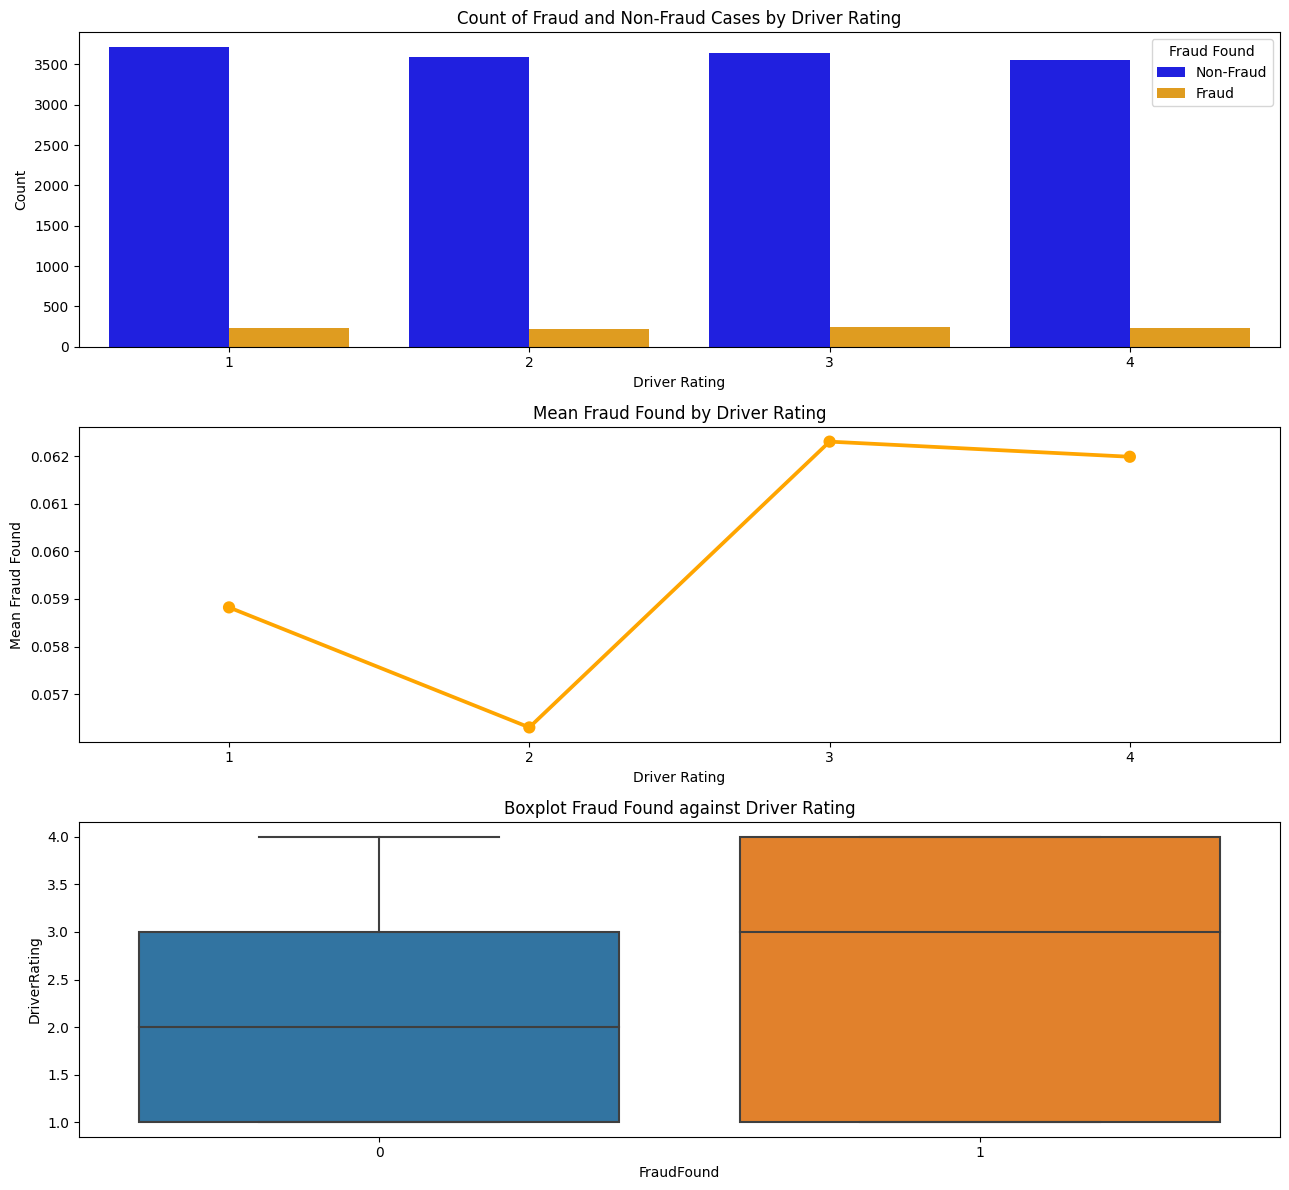

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(13, 12))

sns.countplot(x='DriverRating', hue='FraudFound', data=df, ax=ax[0], palette=["blue","orange"])
ax[0].set_title('Count of Fraud and Non-Fraud Cases by Driver Rating')
ax[0].set_xlabel('Driver Rating')
ax[0].set_ylabel('Count')
ax[0].legend(title='Fraud Found', labels=['Non-Fraud', 'Fraud'])

rating_fraud = df.groupby('DriverRating')['FraudFound'].mean()
sns.pointplot(x=rating_fraud.index, y=rating_fraud.values, ax=ax[1],color="orange")
ax[1].set_title('Mean Fraud Found by Driver Rating')
ax[1].set_xlabel('Driver Rating')
ax[1].set_ylabel('Mean Fraud Found')

sns.boxplot( y=df["DriverRating"], x=df["FraudFound"])
ax[2].set_title('Boxplot Fraud Found against Driver Rating')

plt.tight_layout()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

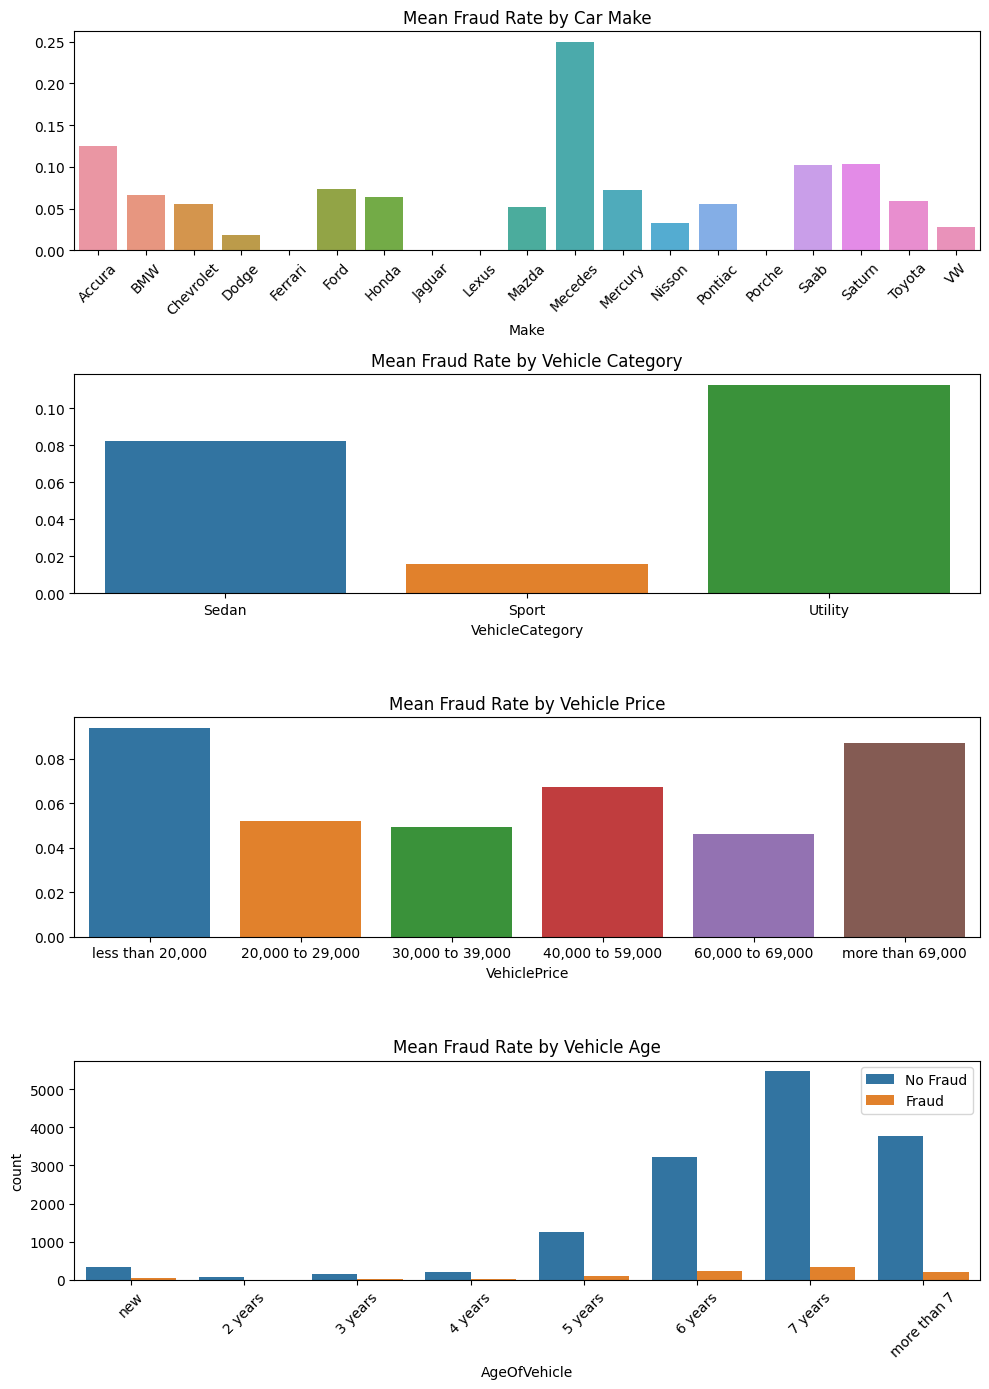

In [14]:
make_fraud = df.groupby('Make')['FraudFound'].mean()
category_fraud = df.groupby('VehicleCategory')['FraudFound'].mean()
price_fraud = df.groupby('VehiclePrice')['FraudFound'].mean()
vehAge_fraud = df.groupby('AgeOfVehicle')['FraudFound'].mean()

fig, ax = plt.subplots(4, 1, figsize=(10,14))
age_order = [ 'new','2 years','3 years', '4 years','5 years' ,'6 years', '7 years', 'more than 7',]
price_order =['less than 20,000', '20,000 to 29,000', '30,000 to 39,000',  '40,000 to 59,000', '60,000 to 69,000','more than 69,000']
sns.barplot(x=make_fraud.index, y=make_fraud.values, ax=ax[0])
sns.barplot(x=category_fraud.index, y=category_fraud.values, ax=ax[1])
sns.barplot(x=price_fraud.index, y=price_fraud.values, ax=ax[2], order = price_order)
sns.countplot(x = 'AgeOfVehicle', hue = "FraudFound", data = df, order=age_order)

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)


ax[0].set_title('Mean Fraud Rate by Car Make')
ax[1].set_title('Mean Fraud Rate by Vehicle Category')
ax[2].set_title('Mean Fraud Rate by Vehicle Price')
ax[3].set_title('Mean Fraud Rate by Vehicle Age')
ax[3].legend(['No Fraud','Fraud'], loc ='upper right')

plt.tight_layout()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


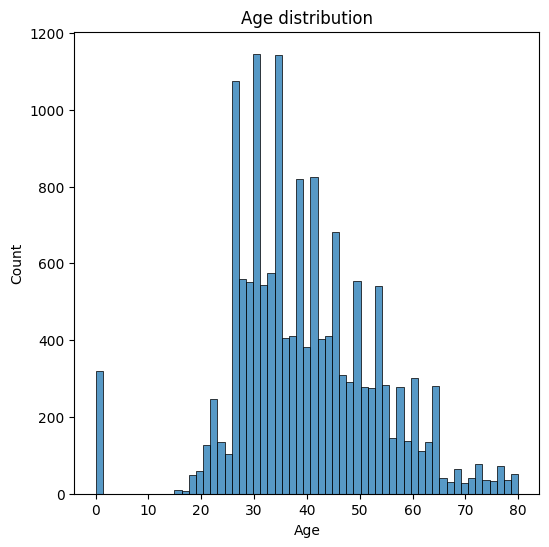

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

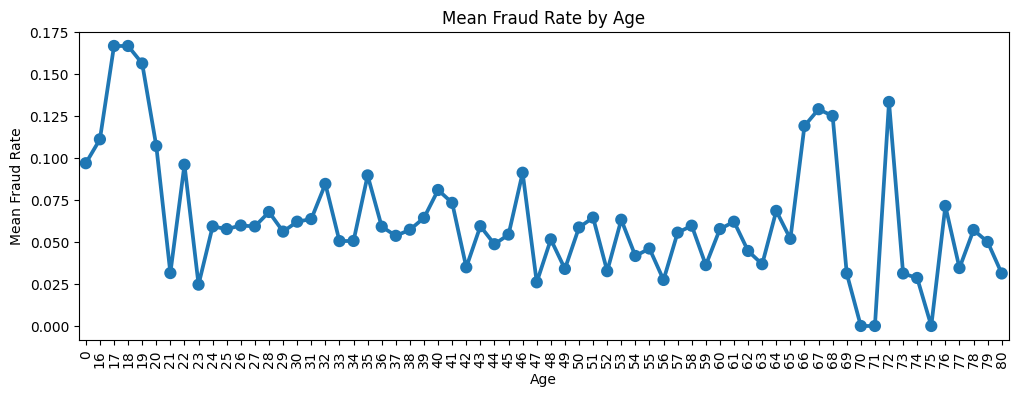

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(df['Age'])
plt.title('Age distribution')
plt.show()

age_fraud = df.groupby('Age')['FraudFound'].mean().reset_index()
plt.figure(figsize=(12, 4))
sns.pointplot(data=age_fraud, x='Age', y='FraudFound')
plt.title('Mean Fraud Rate by Age')

plt.xlabel('Age')
plt.ylabel('Mean Fraud Rate')
plt.xticks(rotation=90)  

plt.show()

### Potential Outliers

Rows with Age == 0 seem to fall under 16 to 17 age range under AgeOfPolicyHolder feature

In [16]:
df.loc[df.Age == 0, "AgeOfPolicyHolder"].value_counts()

AgeOfPolicyHolder
16 to 17    320
Name: count, dtype: int64

Not Possible for month to be 0, we will deal with this outlier in preprocessing

In [17]:
df[df.MonthClaimed == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,0


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

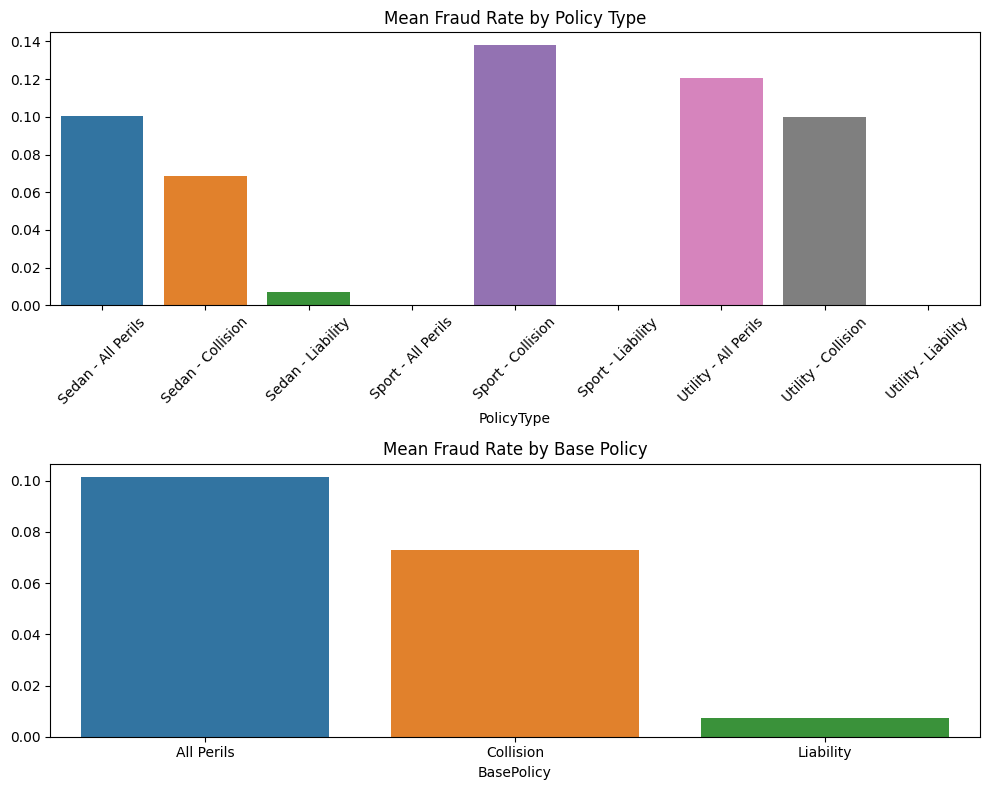

In [18]:
policyType_fraud = df.groupby('PolicyType')['FraudFound'].mean()
basePolicy_fraud = df.groupby('BasePolicy')['FraudFound'].mean()

fig, ax = plt.subplots(2, 1, figsize=(10,8))

sns.barplot(x=policyType_fraud.index, y=policyType_fraud.values, ax=ax[0])
sns.barplot(x=basePolicy_fraud.index, y=basePolicy_fraud.values, ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

ax[0].set_title('Mean Fraud Rate by Policy Type')
ax[1].set_title('Mean Fraud Rate by Base Policy')

plt.tight_layout()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

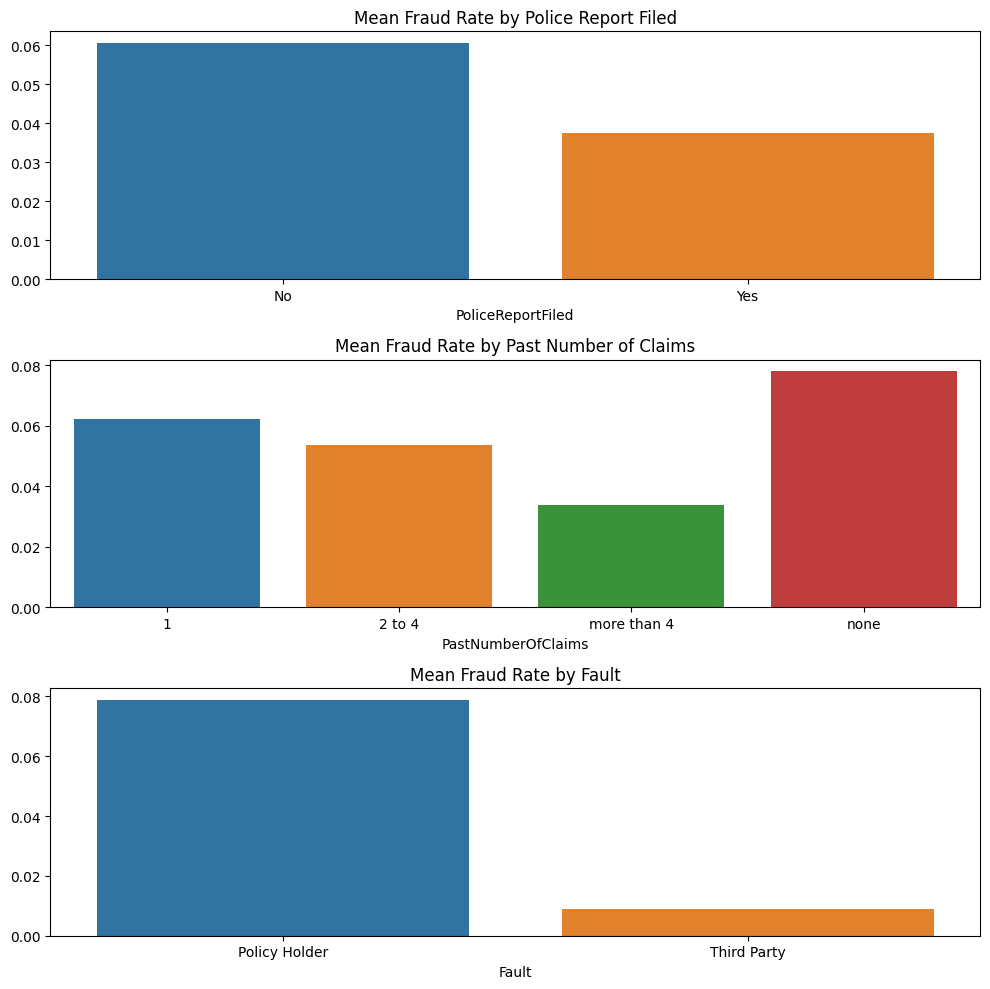

In [19]:
police_fraud = df.groupby('PoliceReportFiled')['FraudFound'].mean()
pastClaims_fraud = df.groupby('PastNumberOfClaims')['FraudFound'].mean()
fault_fraud = df.groupby('Fault')['FraudFound'].mean()

fig, ax = plt.subplots(3, 1, figsize=(10,10))

sns.barplot(x=police_fraud.index, y=police_fraud.values, ax=ax[0])
sns.barplot(x=pastClaims_fraud.index, y=pastClaims_fraud.values, ax=ax[1])
sns.barplot(x=fault_fraud.index, y=fault_fraud.values, ax=ax[2])

ax[0].set_title('Mean Fraud Rate by Police Report Filed')
ax[1].set_title('Mean Fraud Rate by Past Number of Claims')
ax[2].set_title('Mean Fraud Rate by Fault')

plt.tight_layout()

### Correlation Matrix between FraudFound and Categorical Variables (String Datatype)

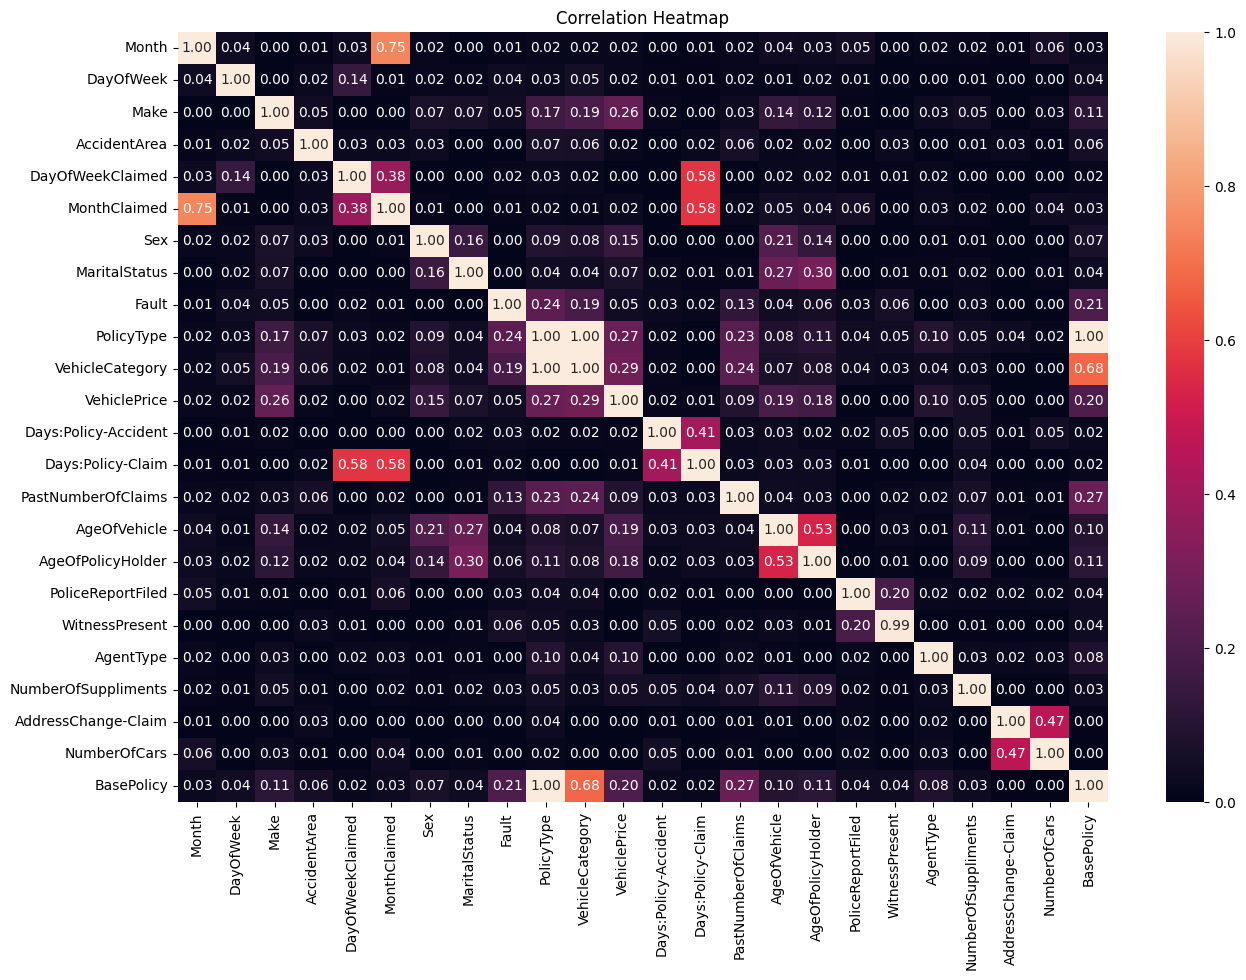

In [20]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df1 = df.select_dtypes(include="object")
corr_matrix = pd.DataFrame(index=df1.columns, columns=df1.columns)

for i in df1.columns:
    for j in df1.columns:
        corr_matrix.loc[i, j] = cramers_v(df1[i], df1[j])

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix.astype(float), annot=True,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


### Correlation Matrix between FraudFound and Categorical Variables (Numerical Datatype)

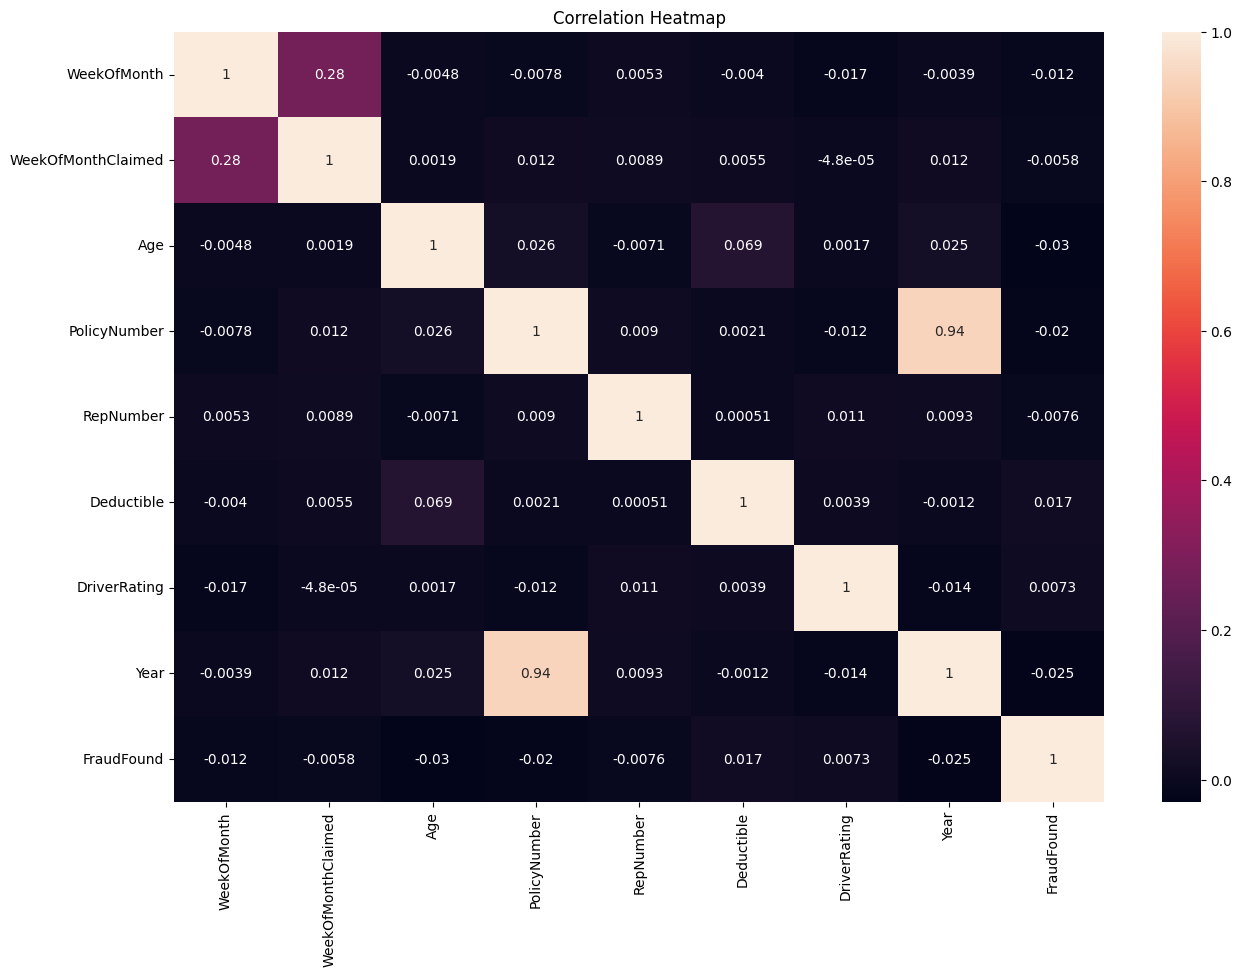

In [21]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing and Data Splitting

In [22]:
import pandas as pd
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def get_processed_data():
    ## Global data preprocessing
    df = pd.read_csv("carclaims.csv")
    df = df.drop(columns=['PolicyNumber',"PolicyType", "RepNumber"])
    df['Age'] =df['Age'].replace({0:16.5})
    df = df[df["MonthClaimed"]!='0']
    
    ## Feature Creation
    # Weekend Feature
    df["Weekend"] = df["DayOfWeek"].apply(lambda x: 1 if x in ["Saturday", "Sunday"] else 0)
    
    # Accident Prone age groups based on https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/810853
    df["AccidentProneAge"] = df["Age"].apply(lambda x: 1 if (16 <= int(x) <= 25 | int(x) > 65) else 0)
    
    
    ## Encoding ordinal features
    col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
        {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
        {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
        {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
        {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
        {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
        {'col':'VehiclePrice','mapping':{'less than 20,000':1,'20,000 to 29,000':2,'30,000 to 39,000':3,
                                        '40,000 to 59,000':4,'60,000 to 69,000':5, 'more than 69,000':6}},
        {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
        {'col':'Days:Policy-Accident','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
        {'col':'Days:Policy-Claim','mapping':{'more than 30':4,'15 to 30':3,'none':0,'1 to 7':1,'8 to 15':2}},
        {'col':'AgeOfPolicyHolder','mapping':{'16 to 17':1,'18 to 20':2,'21 to 25':3,'26 to 30':4,'31 to 35':5,'36 to 40':6,
                                            '41 to 50':7,'51 to 65':8,'over 65':9}},
        {'col':'AddressChange-Claim','mapping':{'no change':0,'under 6 months':1,'1 year':2,'2 to 3 years':3,'4 to 8 years':4}},
        {'col':'NumberOfCars','mapping':{'1 vehicle':1,'2 vehicles':2,'3 to 4':3,'5 to 8':4,'more than 8':5}}]



    ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)
    df2 = df.copy()
    df2 = ord_encoder.fit_transform(df2)

    ## Encoding nominal features
    onehot = OneHotEncoder(cols=["Make",'MaritalStatus', 'VehicleCategory', 'BasePolicy'], use_cat_names=True, return_df=True) 
    df3 = onehot.fit_transform(df2)

    df4 = df3.copy()
    df4[['PoliceReportFiled', 'WitnessPresent']] = df3[['PoliceReportFiled', 'WitnessPresent']].replace({'No': 0, 'Yes': 1})
    df4[['AccidentArea']] = df4[['AccidentArea']].replace( {
        'Rural' : 0,
        'Urban' : 1
        })
    df4[['Fault']] = df4[['Fault']].replace( {
        'Third Party' : 0,
        'Policy Holder' : 1
        })
    df4[['Sex']] = df4[['Sex']].replace( {
        'Female' : 0,
        'Male' : 1
        })
    df4[['AgentType']] = df4[['AgentType']].replace({
        'Internal' : 0,
        'External' : 1
        })
    df4[['FraudFound']] = df4[['FraudFound']].replace({
        'No' : 0,
        'Yes' : 1
        })

    # df_binary_encoded = pd.get_dummies(df4['Make'], prefix='Make')
    # df4 = pd.concat([df4, df_binary_encoded], axis=1)
    # df4 = df4.drop('Make', axis=1)
    
    df4.to_csv('processed_data.csv', index=False)

    X = df4.drop('FraudFound', axis=1)  # Features
    y = df4['FraudFound']  # Target variable

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print("Training set shape:", X_train.shape, y_train.shape)
    print("Validation set shape:", X_val.shape, y_val.shape)
    print("Test set shape:", X_test.shape, y_test.shape)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return df4, X_train, y_train, X_val, y_val, X_test, y_test

#### Sampling Methods

In [23]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule

def undersample(X_train, y_train):
    undersampled_data = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_under, y_under = undersampled_data.fit_resample(X_train, y_train)
    return X_under, y_under

def oversample(X_train, y_train):
    oversampled_data = RandomOverSampler(sampling_strategy='minority', random_state=42)
    X_over, y_over = oversampled_data.fit_resample(X_train, y_train)
    return X_over, y_over

def smote(X_train, y_train):
    smote_data = SMOTE(random_state=42)
    X_smote, y_smote = smote_data.fit_resample(X_train, y_train)
    return X_smote, y_smote

def ncr(X_train, y_train):
    undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
    y_copy = y_train.copy()
    y_copy = y_copy.replace("Yes", 1)
    y_copy = y_copy.replace("No", 0)
    X_ncr, y_ncr = undersample.fit_resample(X_train, y_copy)
    # y_ncr = y_ncr.replace("Yes", 1)
    # y_ncr = y_ncr.replace("No", 0)
    # y_ncr = y_ncr.replace(1, "Yes")
    # y_ncr = y_ncr.replace(0, "No")
    return X_ncr, y_ncr

#### Feature Selection Methods

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def forward_select(model, X_train, y_train):
    model.fit(X_train, y_train)
    ffs = SequentialFeatureSelector(model, k_features='best', forward=True, n_jobs=-1)
    ffs.fit(X_train, y_train) 
    features = list(ffs.k_feature_names_)
    print(f"Features selected: {features}")
    return features

def backward_select(model, X_train, y_train):
    model.fit(X_train, y_train)
    bfs = SequentialFeatureSelector(model, k_features='best', forward=False, n_jobs=-1)
    bfs.fit(X_train, y_train) 
    features = list(bfs.k_feature_names_)
    print(f"Features selected: {features}")
    return features

def rf_select(X_train, y_train):
    sel = SelectFromModel(RandomForestClassifier(), threshold= "0.5*mean")
    sel.fit(X_train, y_train)
    selected_feat= X_train.columns[(sel.get_support())]
    print(len(selected_feat))
    print(selected_feat)
    return selected_feat

#### Chosen Metrics and Metric Function

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def show_metrics(actual, predicted, pos_label = 'Yes', neg_label = 'No'):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1_score: {f1_score}")

    # Generate ROC curve and calculate AUC
    y_pred_classes = [1 if i>0.5 else 0 for i in predicted]
    fpr, tpr, thresholds = roc_curve(actual, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


def get_metrics(actual, predicted, pos_label = 'Yes', neg_label = 'No'):

    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)

    return accuracy, precision, recall, specificity, f1_score

### Can ignore but don't remove
def show_metrics_DL(actual, predicted, samp, pos_label = 1, neg_label = 0):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    accuracy = metrics.accuracy_score(actual, predicted)
    precision = metrics.precision_score(actual, predicted, pos_label = pos_label)
    recall = metrics.recall_score(actual, predicted, pos_label = pos_label)
    specificity = metrics.recall_score(actual, predicted, pos_label= neg_label)
    f1_score = metrics.f1_score(actual, predicted, pos_label = pos_label)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")
    print(f"F1_score: {f1_score}")

    # Generate ROC curve and calculate AUC
    y_pred_classes = [1 if i>0.5 else 0 for i in predicted]
    fpr, tpr, thresholds = roc_curve(actual, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({samp})')
    plt.legend(loc='lower right')
    plt.show()

## Models

# Logistic Regression

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


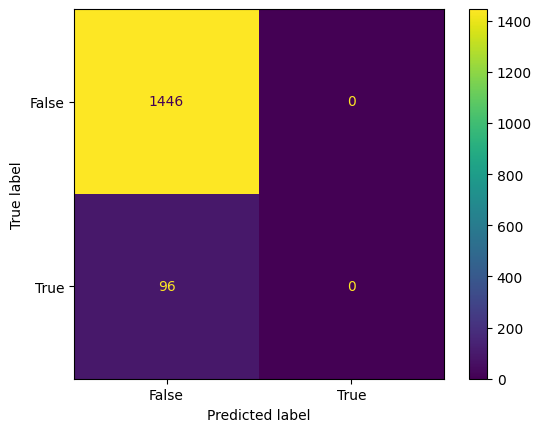

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9377431906614786
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


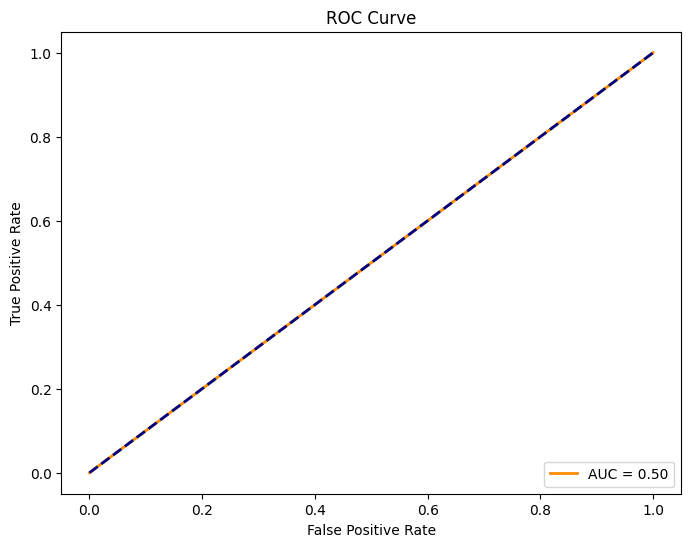

In [27]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Undersample

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


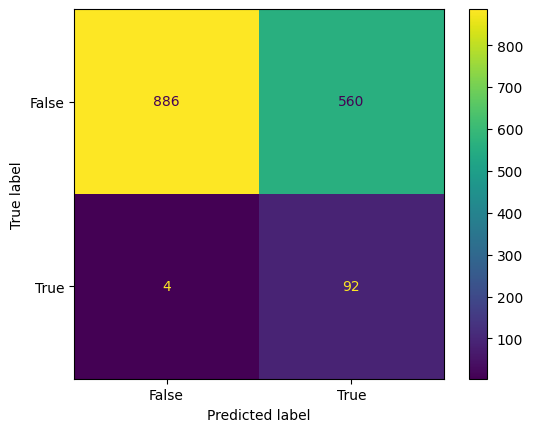

Accuracy: 0.6342412451361867
Precision: 0.1411042944785276
Recall: 0.9583333333333334
Specificity: 0.6127247579529738
F1_score: 0.24598930481283424


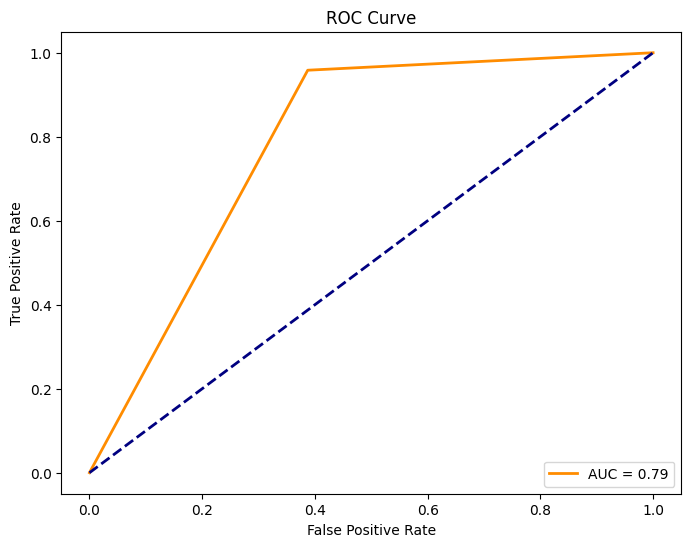

In [28]:
X_under, y_under = undersample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_under, y_under)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversample

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


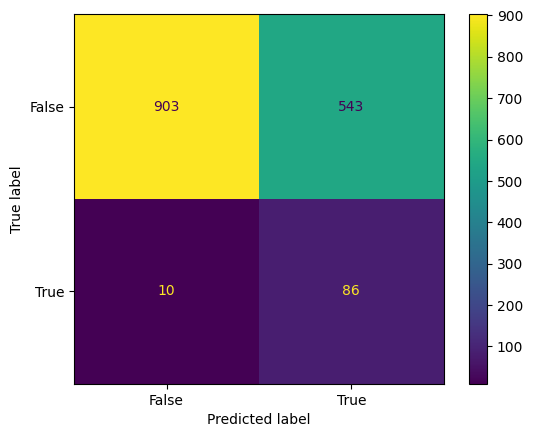

Accuracy: 0.6413748378728924
Precision: 0.13672496025437203
Recall: 0.8958333333333334
Specificity: 0.6244813278008299
F1_score: 0.23724137931034484


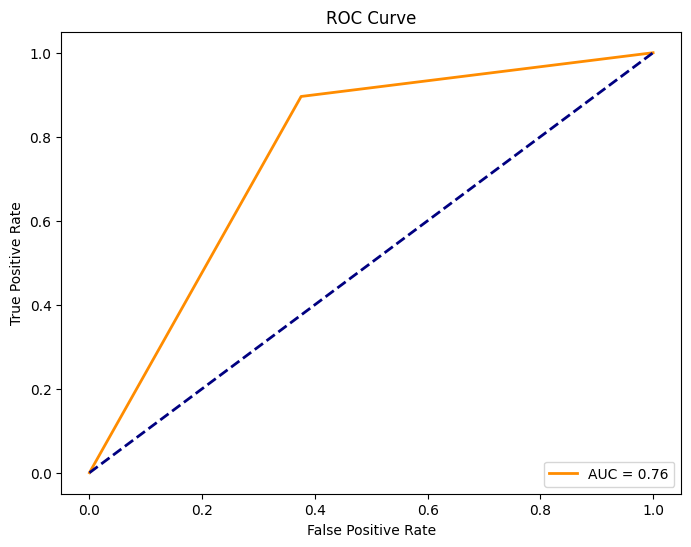

In [29]:
X_over, y_over = oversample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## SMOTE

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


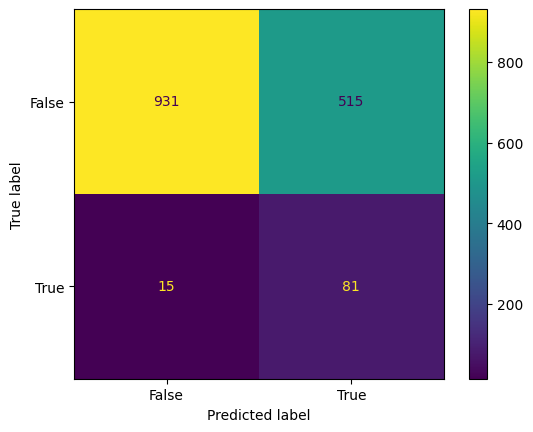

Accuracy: 0.6562905317769131
Precision: 0.13590604026845637
Recall: 0.84375
Specificity: 0.6438450899031812
F1_score: 0.23410404624277456


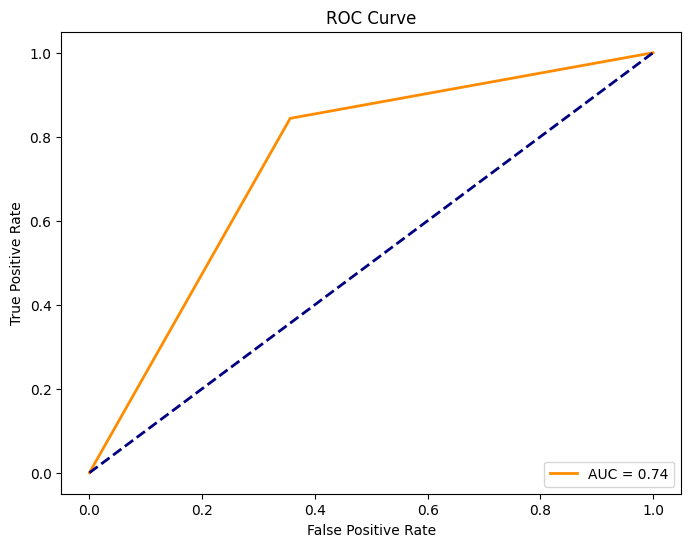

In [30]:
X_smote, y_smote = smote(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_smote, y_smote)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Neighbourhood Cleaning Rule

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


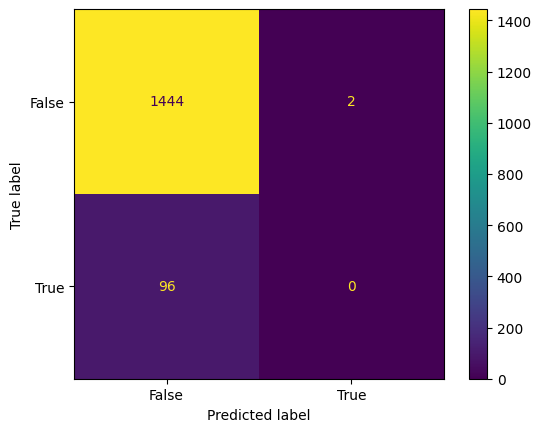

Accuracy: 0.9364461738002594
Precision: 0.0
Recall: 0.0
Specificity: 0.9986168741355463
F1_score: 0.0


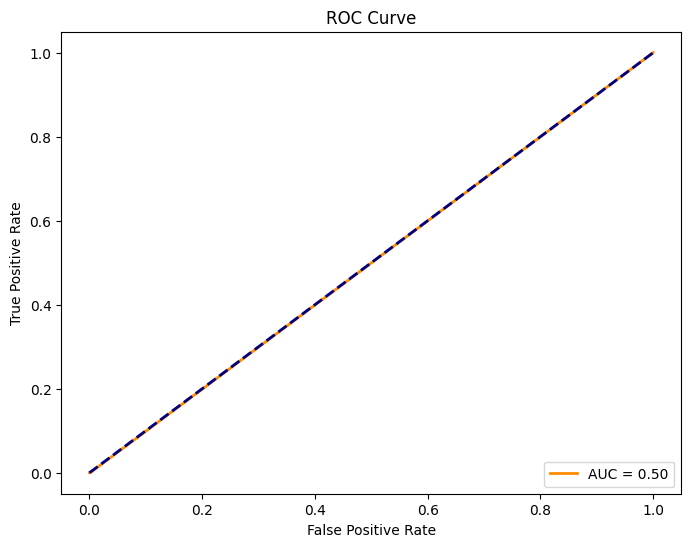

In [31]:
X_ncr, y_ncr = ncr(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_ncr, y_ncr)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversampling with feature selection

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


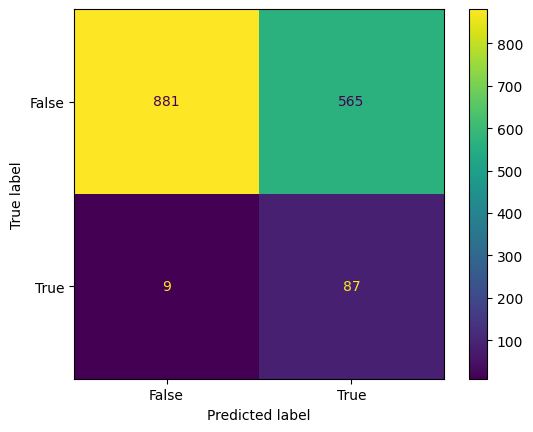

Accuracy: 0.6277561608300908
Precision: 0.1334355828220859
Recall: 0.90625
Specificity: 0.6092669432918395
F1_score: 0.232620320855615


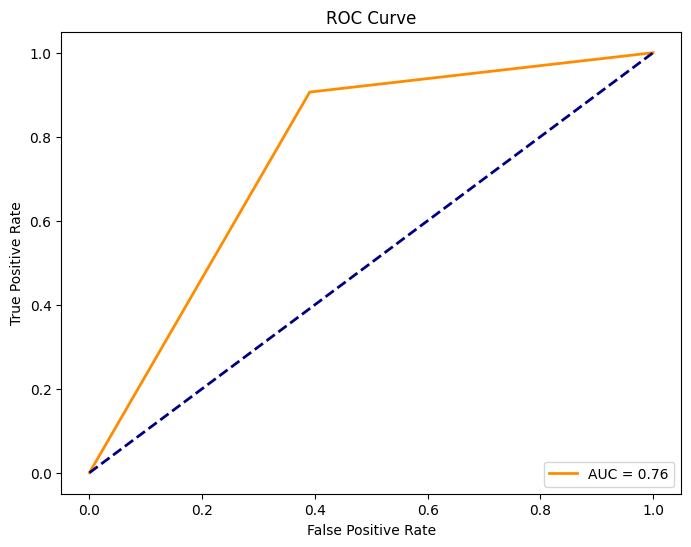

In [32]:
features = rf_select(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_over = X_over[features]
X_val_over = X_val[features]
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val_over)
show_metrics(y_val, predicted, 1, 0)

## Checking best model against test data

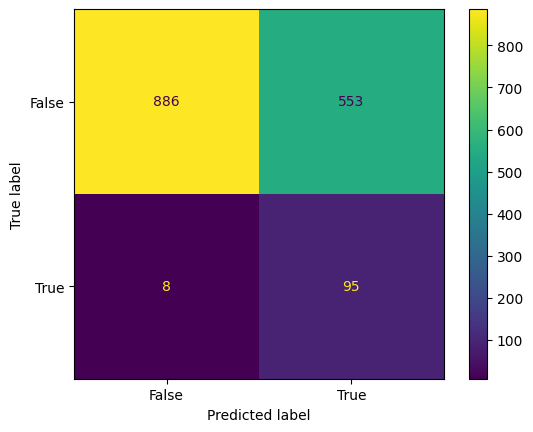

Accuracy: 0.6361867704280155
Precision: 0.14660493827160495
Recall: 0.9223300970873787
Specificity: 0.6157053509381515
F1_score: 0.2529960053262317


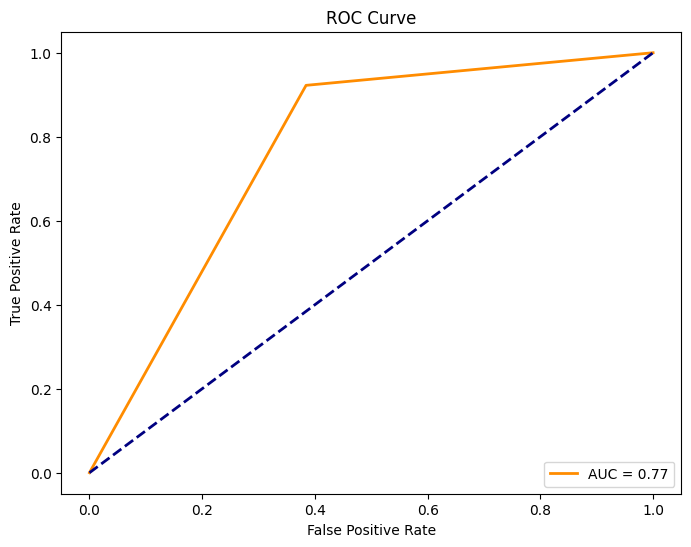

In [33]:
X_test = X_test[features]
predicted = logr.predict(X_test)
show_metrics(y_test, predicted, 1, 0)

# Random Forest

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
import numpy as np
from collections import Counter
from feature_selection import rf_select


pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

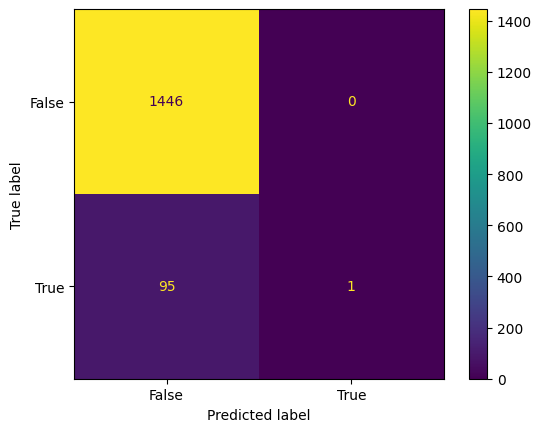

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


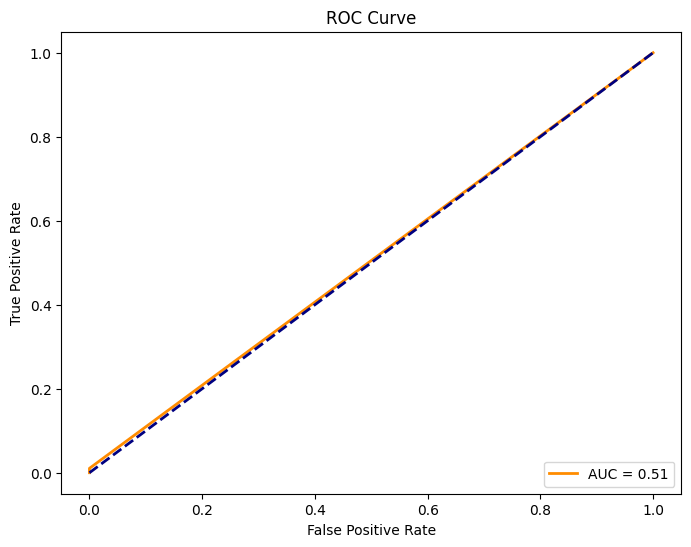

In [35]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Undersample

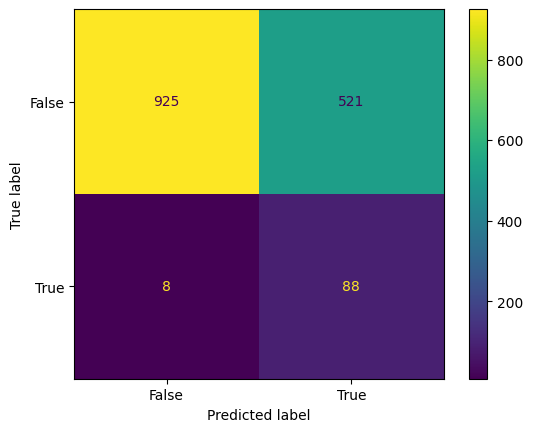

Accuracy: 0.6569390402075227
Precision: 0.1444991789819376
Recall: 0.9166666666666666
Specificity: 0.6396957123098201
F1_score: 0.249645390070922


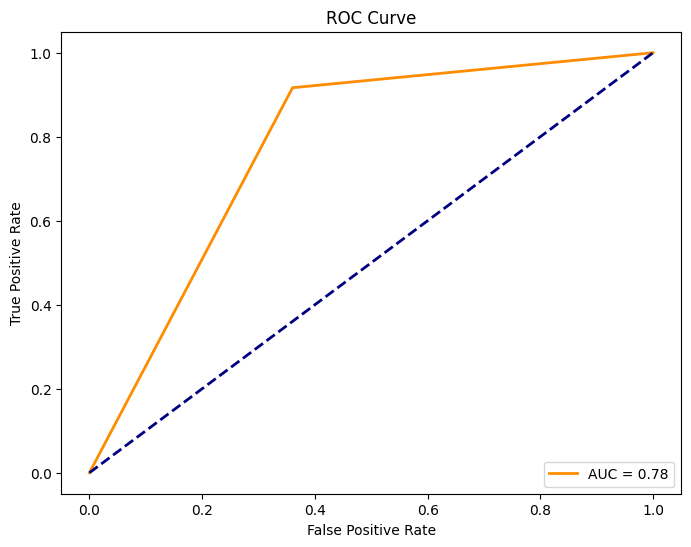

In [36]:
X_under, y_under = undersample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Oversample

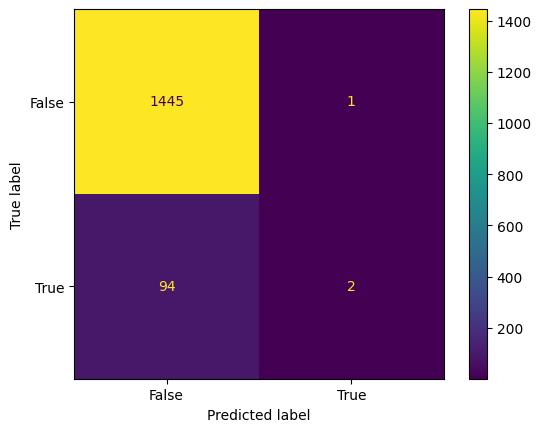

Accuracy: 0.9383916990920882
Precision: 0.6666666666666666
Recall: 0.020833333333333332
Specificity: 0.9993084370677732
F1_score: 0.0404040404040404


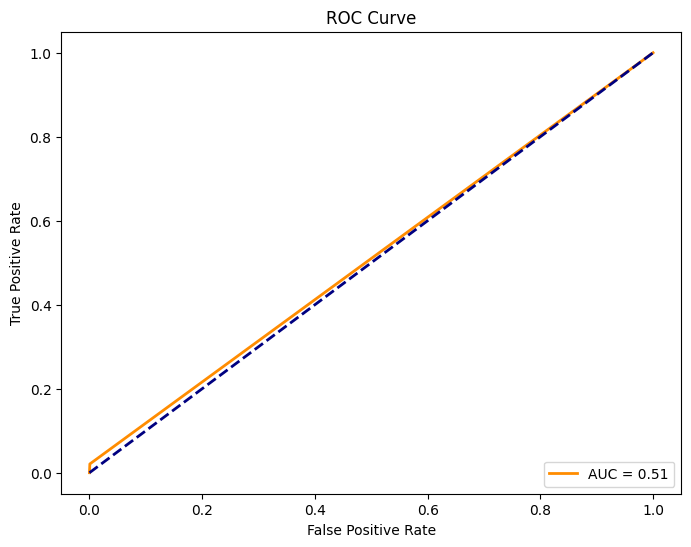

In [37]:
X_over, y_over = oversample(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_over, y_over)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE

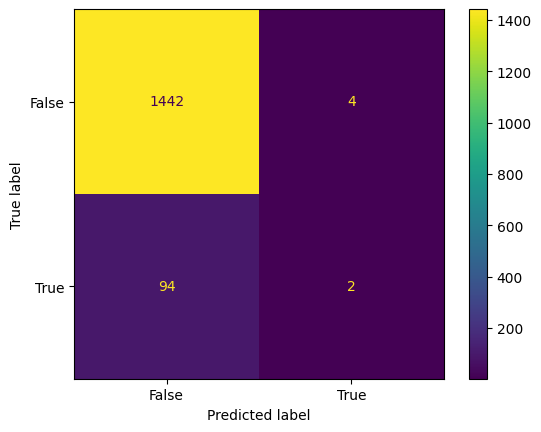

Accuracy: 0.9364461738002594
Precision: 0.3333333333333333
Recall: 0.020833333333333332
Specificity: 0.9972337482710927
F1_score: 0.0392156862745098


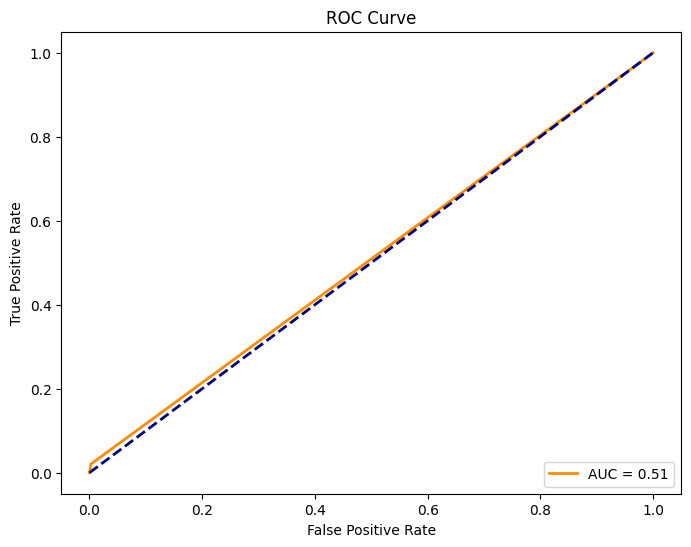

In [38]:
X_smote, y_smote = smote(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Neighbourhood Cleaning Rule

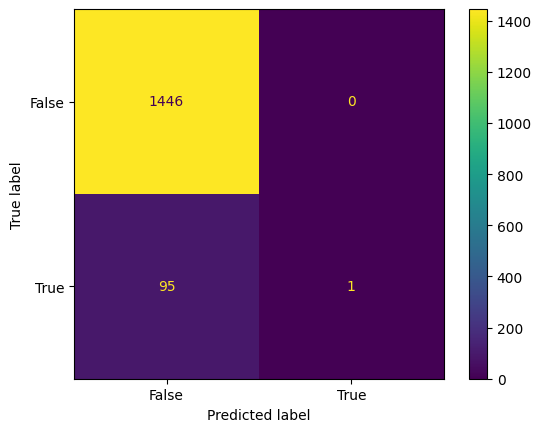

Accuracy: 0.9383916990920882
Precision: 1.0
Recall: 0.010416666666666666
Specificity: 1.0
F1_score: 0.020618556701030924


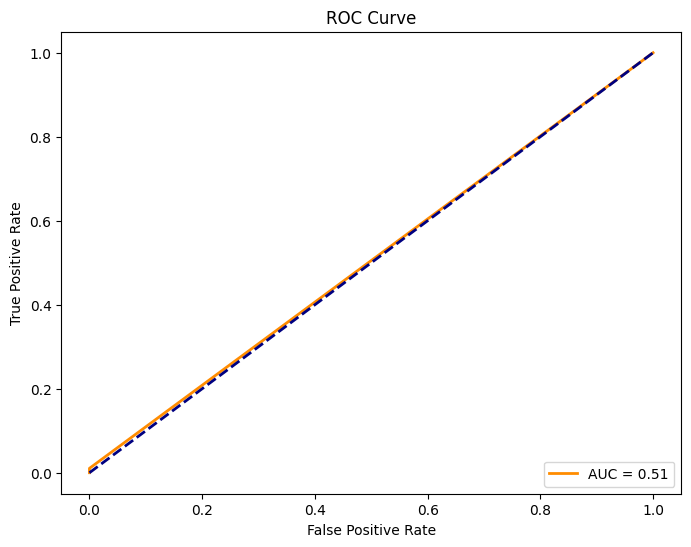

In [39]:
X_ncr, y_ncr = ncr(X_train, y_train)
rf = RandomForestClassifier()
rf.fit(X_ncr, y_ncr)
y_pred = rf.predict(X_val)
show_metrics(y_val, y_pred, 1, 0)

## Feature Selection

In [40]:
features = rf_select(X_train, y_train)

## Undersampling with feature selection

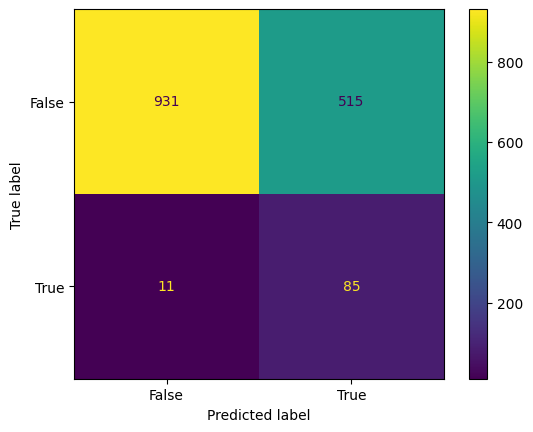

Accuracy: 0.6588845654993515
Precision: 0.14166666666666666
Recall: 0.8854166666666666
Specificity: 0.6438450899031812
F1_score: 0.24425287356321837


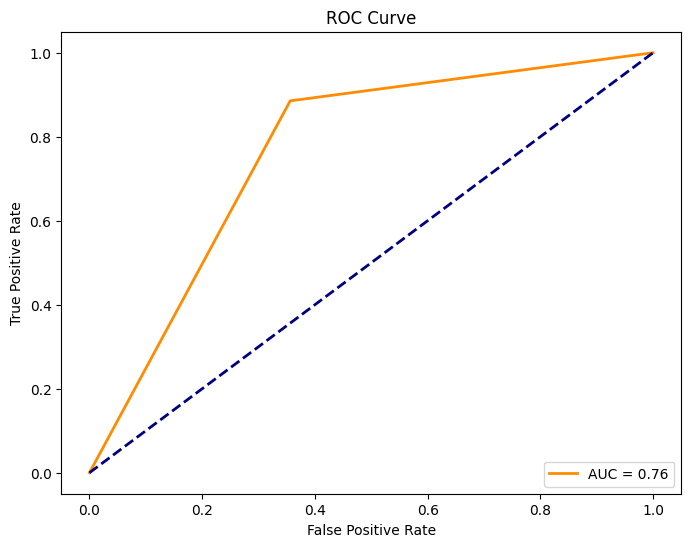

In [41]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_under, y_under)
y_pred = rf.predict(X_val_under)
show_metrics(y_val, y_pred, 1, 0)

## SMOTE with feature selection

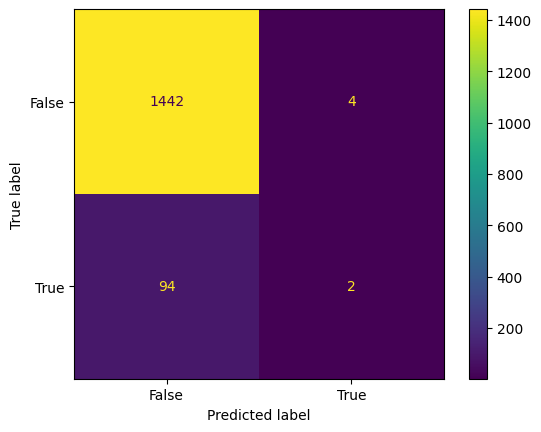

Accuracy: 0.9364461738002594
Precision: 0.3333333333333333
Recall: 0.020833333333333332
Specificity: 0.9972337482710927
F1_score: 0.0392156862745098


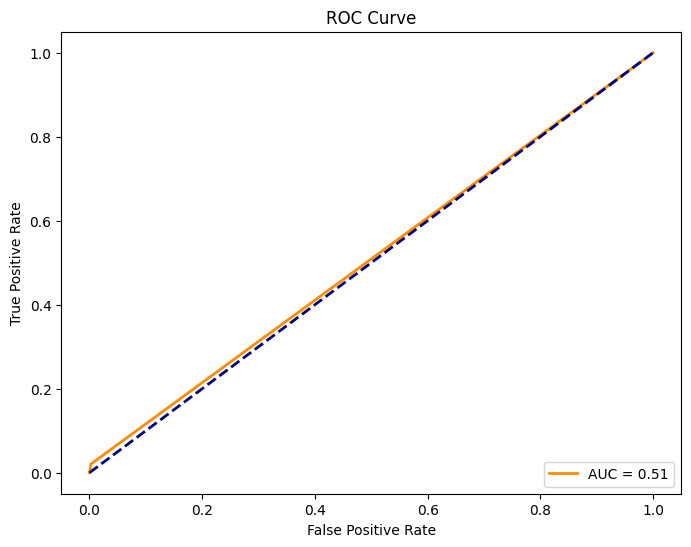

In [42]:
X_smote, y_smote = smote(X_train, y_train)
X_smote = X_smote[features]
X_val_smote = X_val[features]
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
y_pred = rf.predict(X_val_smote)
show_metrics(y_val, y_pred, 1, 0)

## Undersampling with feature selection and hyperparameter tuning

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


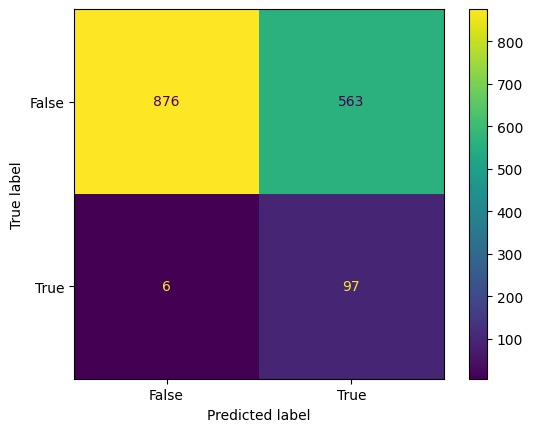

Accuracy: 0.6309987029831388
Precision: 0.14696969696969697
Recall: 0.941747572815534
Specificity: 0.6087560806115357
F1_score: 0.25425950196592395


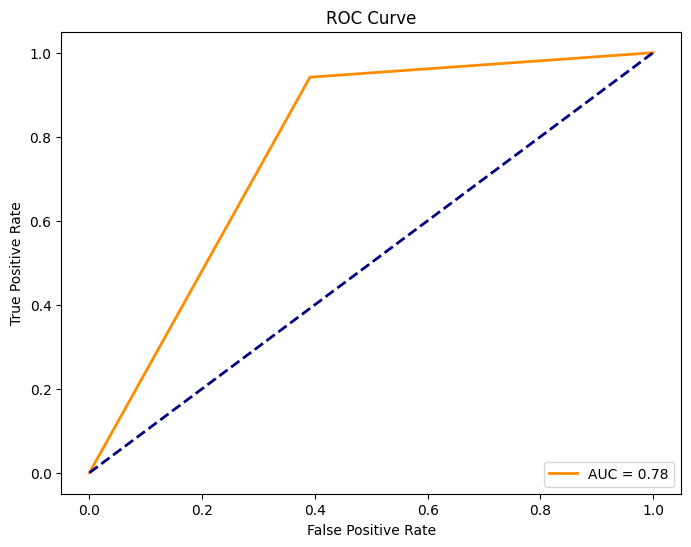

In [43]:
X_under, y_under = undersample(X_train, y_train)
X_under = X_under[features]
X_val_under = X_val[features]
X_test_under = X_test[features]

grid = {'bootstrap': [True],
    'max_depth': [10, 50, 100],
    'max_features': ['log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 300, 1000]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = grid, cv=5, scoring='recall')

grid_search.fit(X_under, y_under)
best_rf = grid_search.best_estimator_
print('Best hyperparameters:',  grid_search.best_params_)

y_pred = best_rf.predict(X_test_under)
show_metrics(y_test, y_pred, 1, 0)

# K Nearest Neighbours

In [44]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV

from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

### Splitting data

In [45]:
df, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Without Sampling 

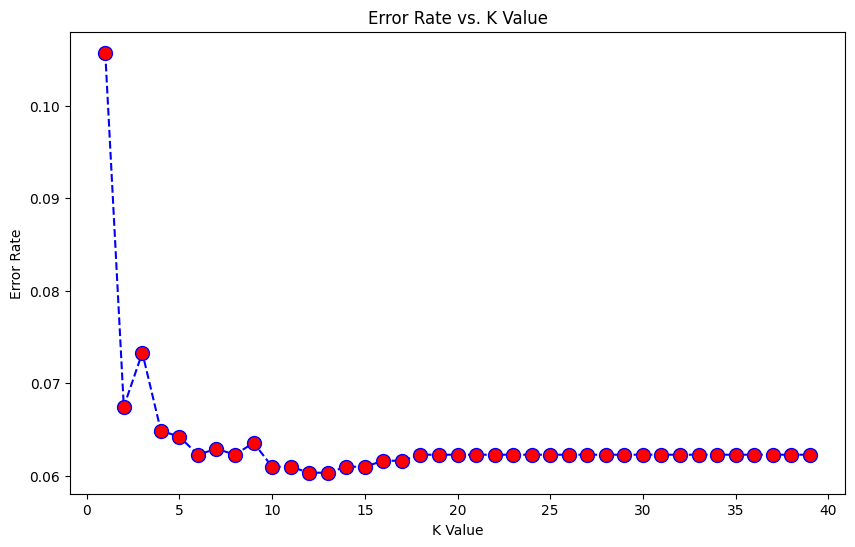

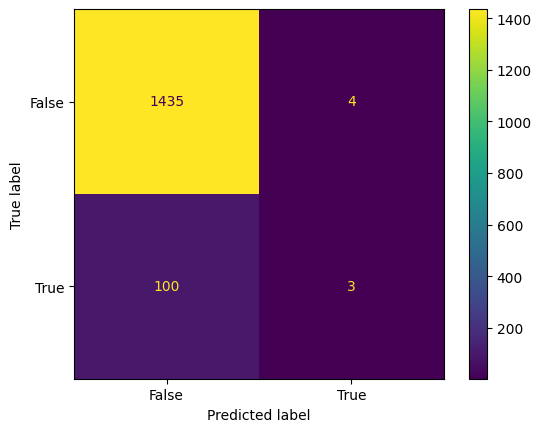

Accuracy: 0.9325551232166018
Precision: 0.42857142857142855
Recall: 0.02912621359223301
Specificity: 0.9972202918693537
F1_score: 0.05454545454545455


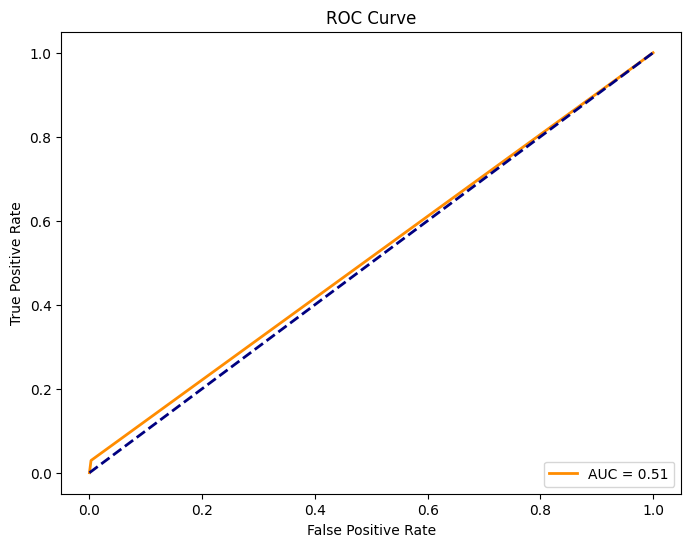

In [46]:
# features = rf_select(X_train, y_train)
# X_train = X_train[features]

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## Undersample (optimal k = 2)

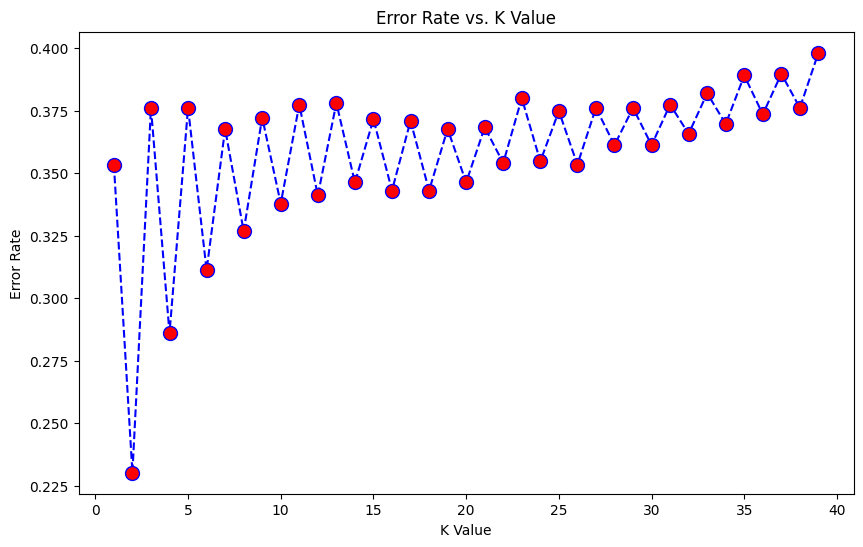

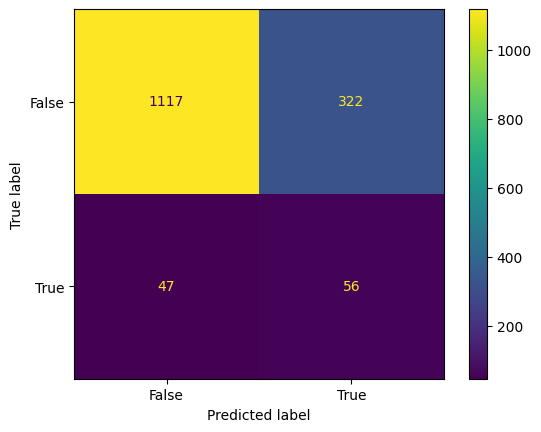

Accuracy: 0.7607003891050583
Precision: 0.14814814814814814
Recall: 0.5436893203883495
Specificity: 0.7762334954829743
F1_score: 0.23284823284823283


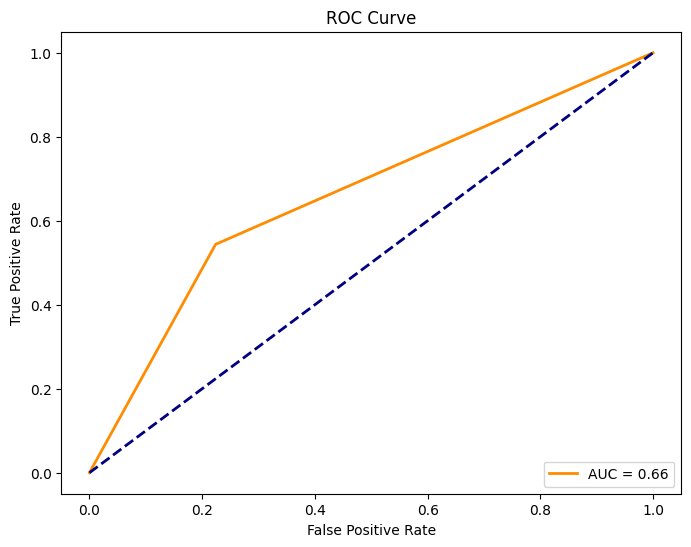

In [47]:
X_under, y_under = undersample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_under,y_under)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_under,y_under)
y_pred = knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## Oversample (optimal k = 2)

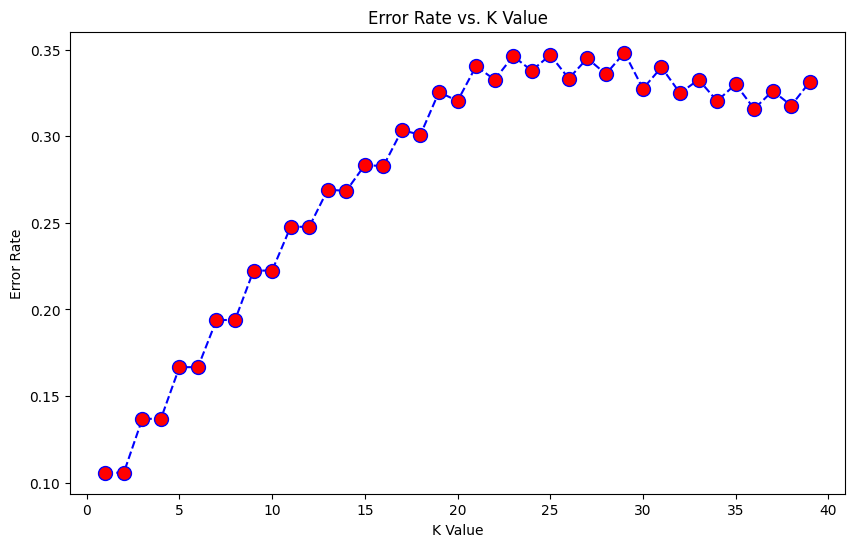

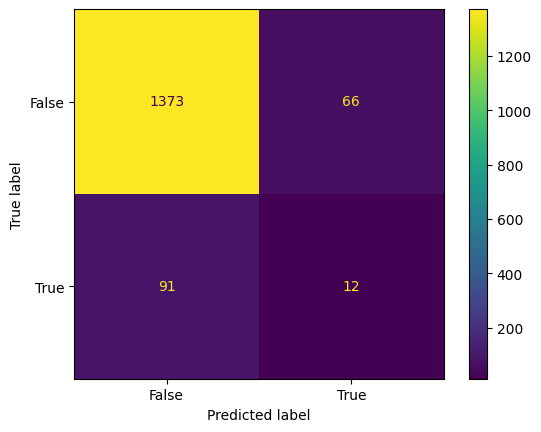

Accuracy: 0.8981841763942932
Precision: 0.15384615384615385
Recall: 0.11650485436893204
Specificity: 0.9541348158443363
F1_score: 0.13259668508287295


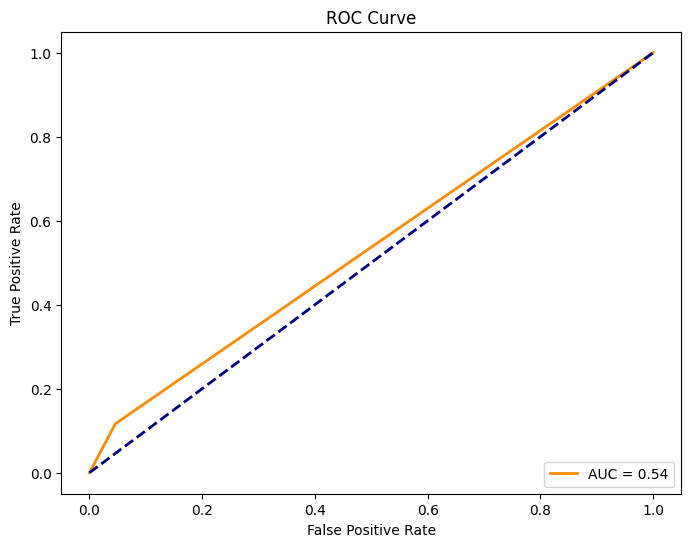

In [48]:
X_over, y_over = oversample(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_over,y_over)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over,y_over)
y_pred = knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## SMOTE (optimal k = 2)

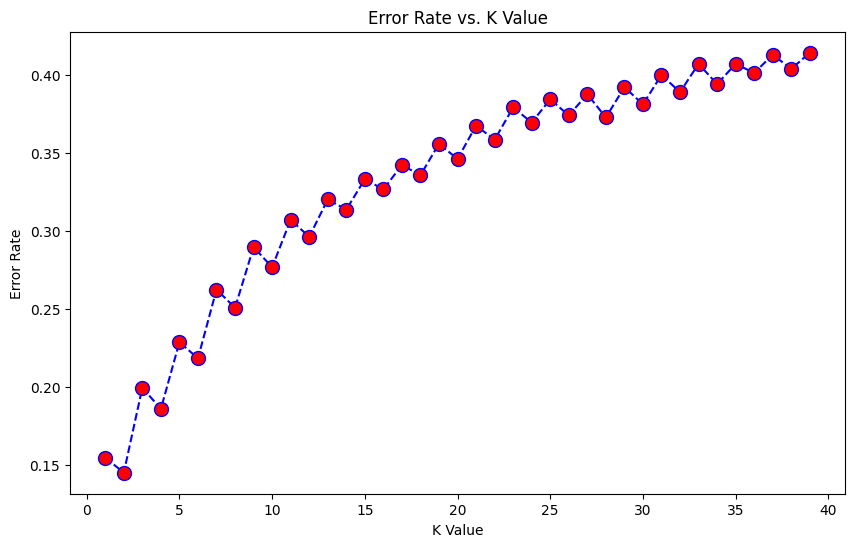

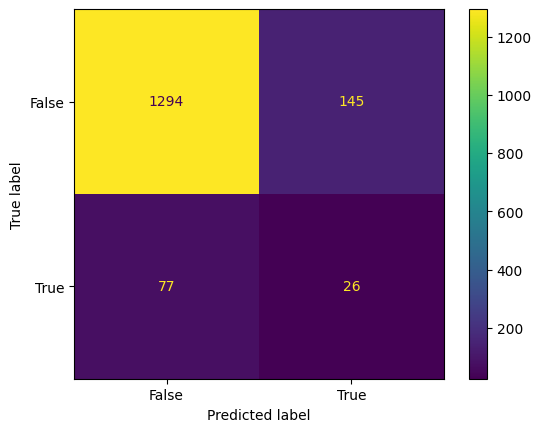

Accuracy: 0.8560311284046692
Precision: 0.15204678362573099
Recall: 0.2524271844660194
Specificity: 0.8992355802640722
F1_score: 0.18978102189781024


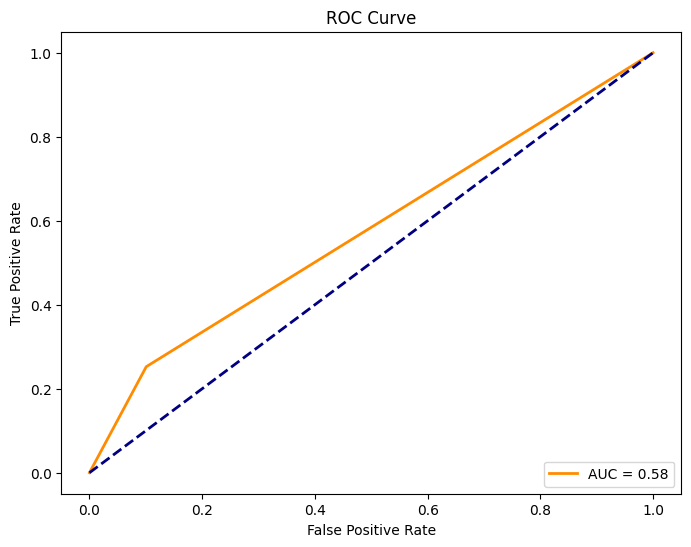

In [49]:
X_smote, y_smote = smote(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_smote,y_smote)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_smote,y_smote)
y_pred = knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## NCR (optimal k = 12)

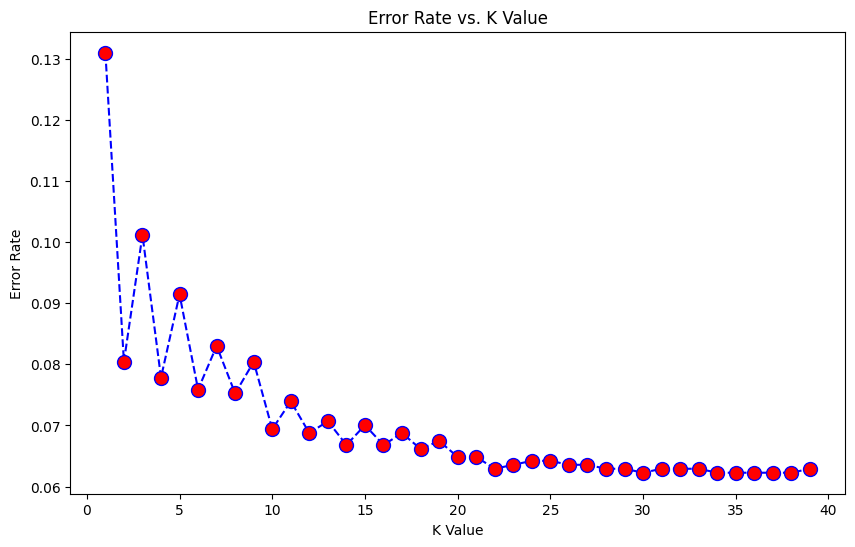

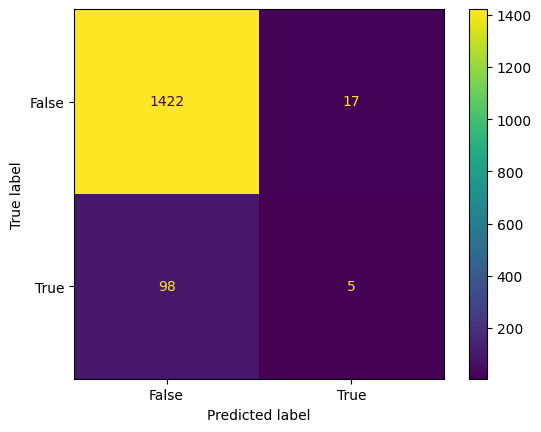

Accuracy: 0.9254215304798963
Precision: 0.22727272727272727
Recall: 0.04854368932038835
Specificity: 0.9881862404447533
F1_score: 0.07999999999999999


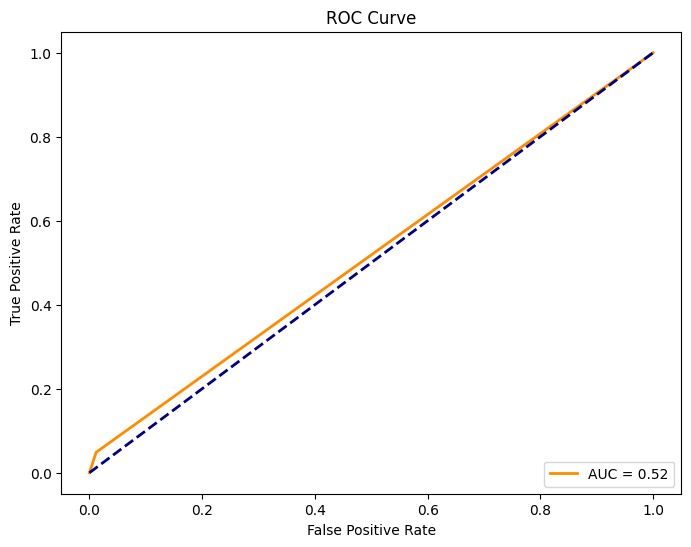

In [50]:
X_ncr, y_ncr = ncr(X_train, y_train)

error_rate = []

for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_ncr,y_ncr)
 pred_i = knn.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error Rate")


knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_ncr,y_ncr)
y_pred = knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## Undersample + Hyperparameter Tuning

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


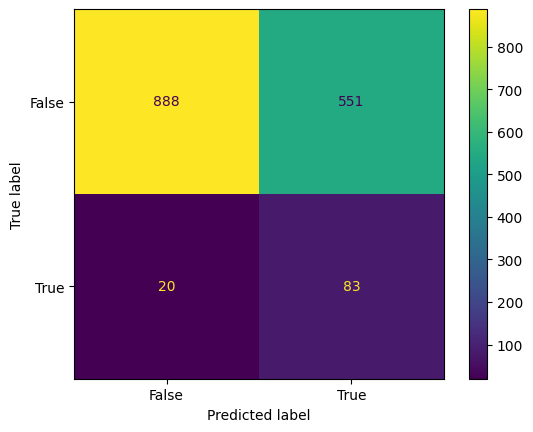

Accuracy: 0.6297016861219196
Precision: 0.1309148264984227
Recall: 0.8058252427184466
Specificity: 0.6170952050034746
F1_score: 0.22523744911804613


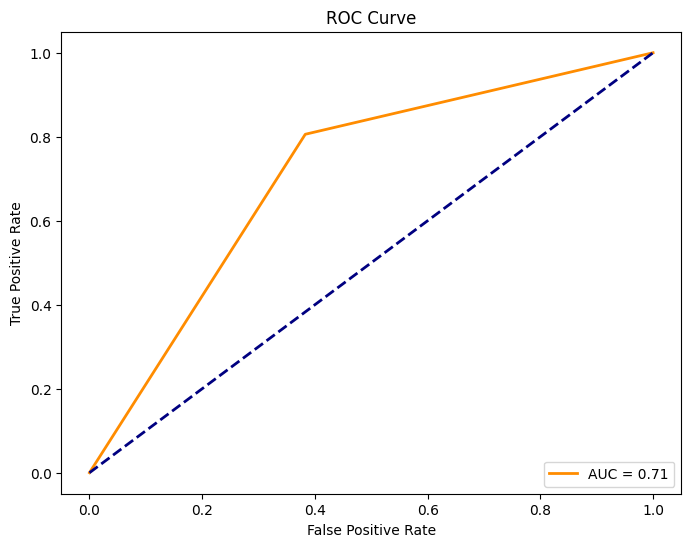

In [51]:
X_under, y_under = undersample(X_train, y_train)

param_grid = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

grid.fit(X_under, y_under)

print("Best Hyperparameters:", grid.best_params_)

best_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn.fit(X_under, y_under)
y_pred = best_knn.predict(X_test)

show_metrics(y_test,y_pred, 1, 0)

## Deep Learning

In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [53]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [54]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics



C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)




Epoch 1/30


726/726 [==============================] - 2s 1ms/step - loss: 0.5499 - accuracy: 0.7336
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4891 - accuracy: 0.7672
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4645 - accuracy: 0.7788
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4449 - accuracy: 0.7899
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4288 - accuracy: 0.8017
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4150 - accuracy: 0.8090
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4023 - accuracy: 0.8176
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3913 - accuracy: 0.8234
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.8296
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.3753 - accuracy: 0.

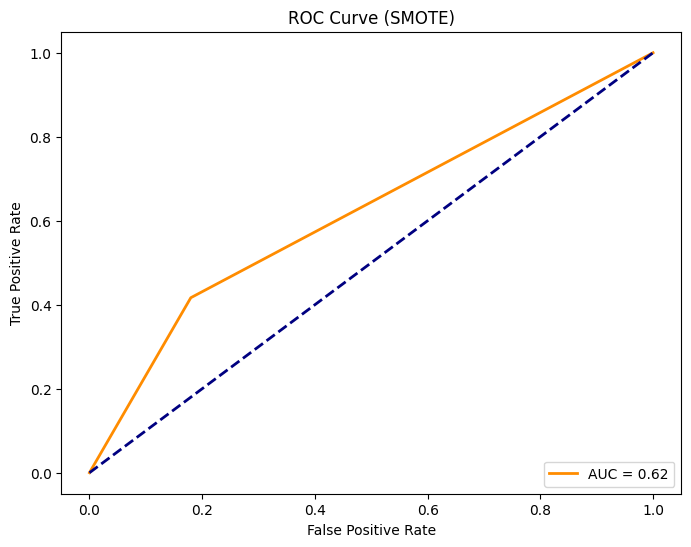

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5677 - accuracy: 0.7154
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5138 - accuracy: 0.7503
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4950 - accuracy: 0.7596
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4819 - accuracy: 0.7691
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4694 - accuracy: 0.7789
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4606 - accuracy: 0.7861
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4525 - accuracy: 0.7877
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4458 - accuracy: 0.7920
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4399 - accuracy: 0.7943
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.7974
Epoch 11/3

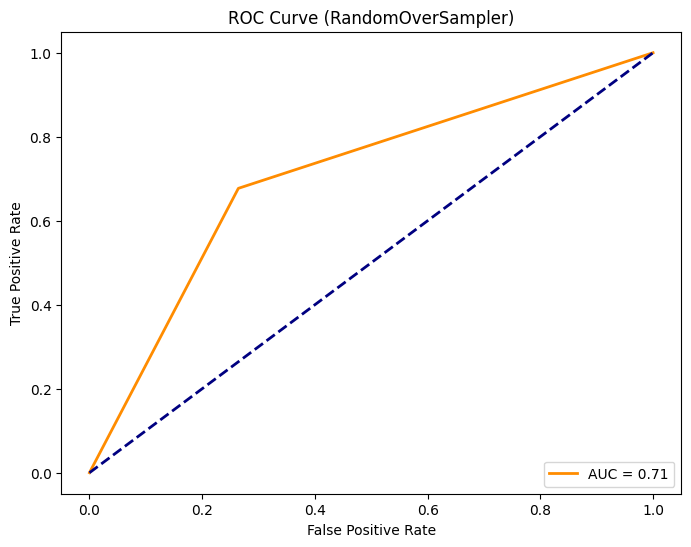

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 1ms/step - loss: 0.6750 - accuracy: 0.5939
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6554
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6775
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5965 - accuracy: 0.7010
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7155
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5673 - accuracy: 0.7279
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5548 - accuracy: 0.7424
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5460 - accuracy: 0.7445
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7479
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7548
Epoch 11/30
46/46 [===========

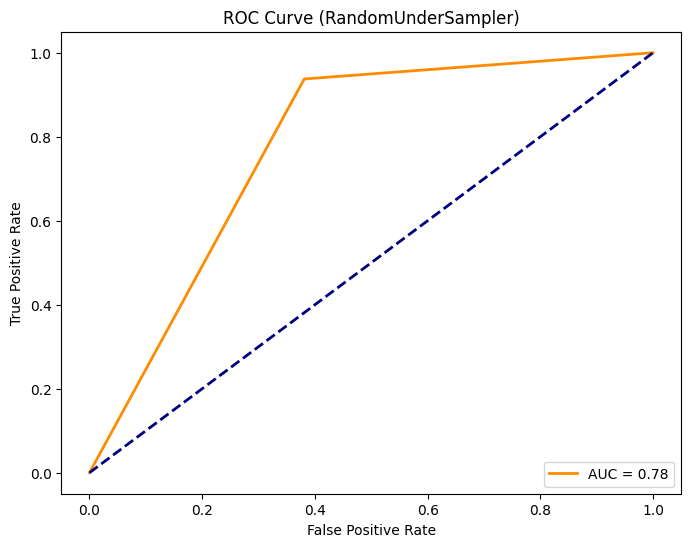

In [55]:
results={}

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



In [56]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.938,0.140,0.244,0.639
RandomOverSampler,0.677,0.145,0.239,0.732
SMOTE,0.417,0.133,0.202,0.795


In [57]:
features = rf_select(X_train, y_train)
X_train_rf = X_train[features]
X_val_rf = X_val[features]
X_test_rf = X_test[features]
print(X_train_rf.shape)
print(y_train.shape)


(12335, 32)
(12335,)


In [58]:
def ann_rf(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train_rf.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann_rf(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann_rf, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5725 - accuracy: 0.7043
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4965 - accuracy: 0.7629
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4796 - accuracy: 0.7673
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy: 0.7760
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4532 - accuracy: 0.7830
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.7904
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4321 - accuracy: 0.7968
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4234 - accuracy: 0.8018
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8038
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8087
Epoch 11/3

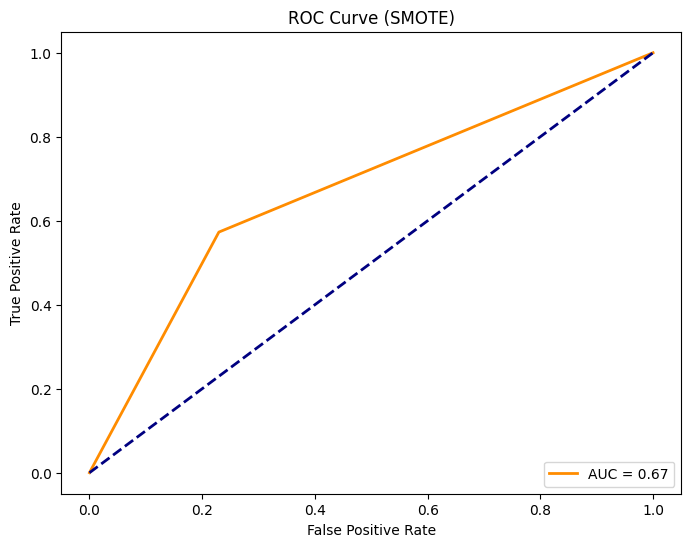

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5760 - accuracy: 0.7042
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5160 - accuracy: 0.7498
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4984 - accuracy: 0.7580
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4839 - accuracy: 0.7690
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4726 - accuracy: 0.7721
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.7737
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4581 - accuracy: 0.7768
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4548 - accuracy: 0.7790
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4504 - accuracy: 0.7815
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4470 - accuracy: 0.7829
Epoch 11/3

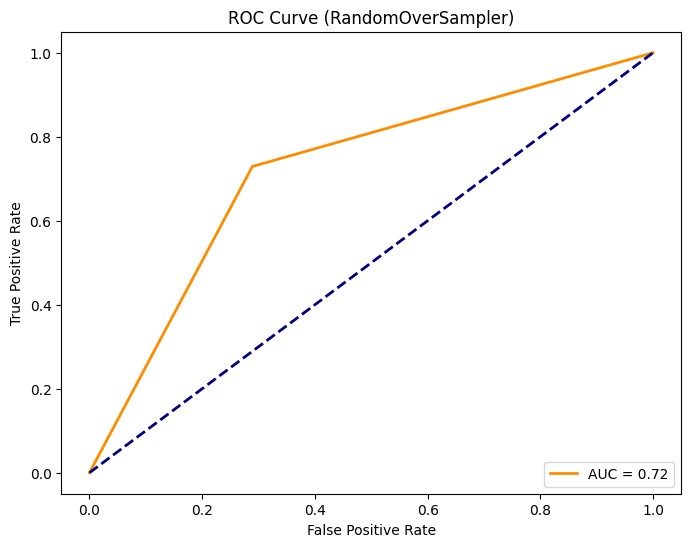

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.6807 - accuracy: 0.5677
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6022
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6278
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6099 - accuracy: 0.6802
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.7023
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5793 - accuracy: 0.7093
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5704 - accuracy: 0.7113
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7341
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5510 - accuracy: 0.7431
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5437 - accuracy: 0.7376
Epoch 11/30
46/46 [===========

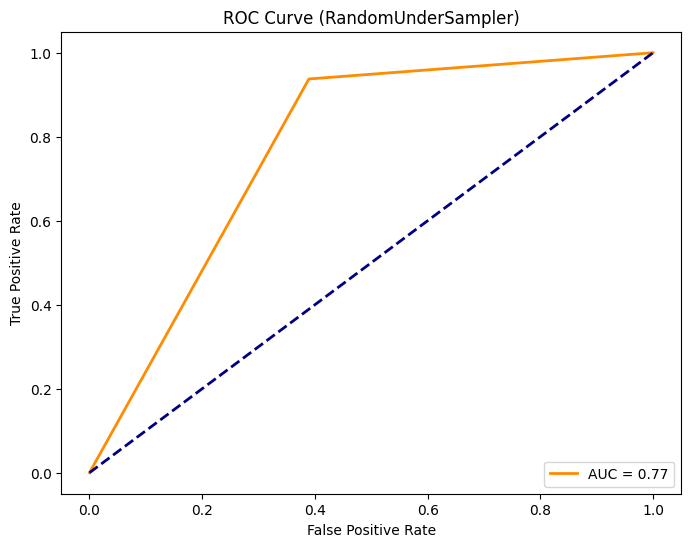

In [59]:
results={}

#smote
X_smote_rf, y_smote_rf = smote(X_train_rf, y_train)

metrics = train_ann_rf(X_smote_rf, y_smote_rf, X_val_rf,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over_rf, y_over_rf = oversample(X_train_rf, y_train)

metrics = train_ann_rf(X_over_rf, y_over_rf, X_val_rf,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under_rf, y_under_rf = undersample(X_train_rf, y_train)

metrics = train_ann_rf(X_under_rf, y_under_rf, X_val_rf,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



In [60]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.938,0.138,0.240,0.631
RandomOverSampler,0.729,0.143,0.240,0.712
SMOTE,0.573,0.142,0.228,0.758


```Hyper-Parameter Tuning```

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under, y_under)

print("Without Feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X

Without Feature Selection, Best: 0.903267 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'hidden_units': 8, 'learning_rate': 0.001, 'optimizer': 'adam'}


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(build_fn=ann_rf, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under_rf, y_under_rf)

print("With feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X

With feature Selection, Best: 0.900524 using {'activation': 'relu', 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 30, 'hidden_units': 16, 'learning_rate': 0.001, 'optimizer': 'adam'}


```Apply ANN Tuned model on test data (No Feature Selection)```

In [63]:
# Without Feature Selection, Best: 0.904667 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.0, 
#                                                  'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.01, 
#                                                  'optimizer': 'adam'}
def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.0, hidden_units=32, learning_rate=0.01, 
                            batch_size=32, epochs=30)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.5977 - accuracy: 0.7013
Epoch 2/30
726/726 [==============================] - 1s 987us/step - loss: 0.5298 - accuracy: 0.7514
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.7577
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5034 - accuracy: 0.7598
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4996 - accuracy: 0.7597
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4970 - accuracy: 0.7602
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4946 - accuracy: 0.7599
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4920 - accuracy: 0.7612
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4887 - accuracy: 0.7624
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4858 - accuracy: 0.7641
Epoch 11

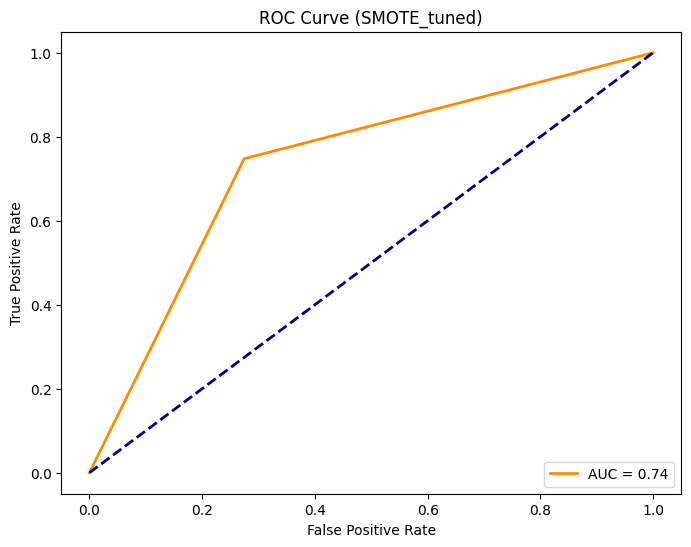

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.6058 - accuracy: 0.6829
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5419 - accuracy: 0.7395
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5237 - accuracy: 0.7477
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7466
Epoch 5/30
726/726 [==============================] - 1s 928us/step - loss: 0.5128 - accuracy: 0.7479
Epoch 6/30
726/726 [==============================] - 1s 988us/step - loss: 0.5105 - accuracy: 0.7475
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5084 - accuracy: 0.7498
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5063 - accuracy: 0.7496
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5039 - accuracy: 0.7511
Epoch 10/30
726/726 [==============================] - 1s 935us/step - loss: 0.5014 - accuracy: 0.7516
Epoc

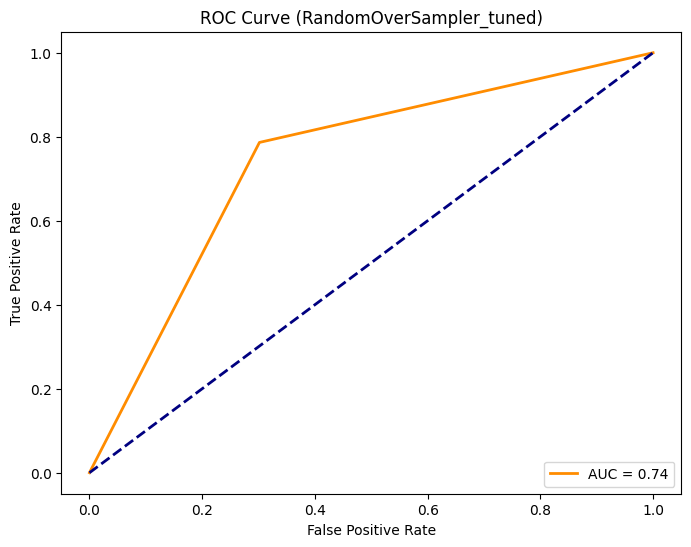

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.7033 - accuracy: 0.5380
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6126
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.7148
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6996
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6151 - accuracy: 0.7244
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6025 - accuracy: 0.7258
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7224
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5808 - accuracy: 0.7293
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.7334
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.7396
Epoch 11/30
46/46 [===========

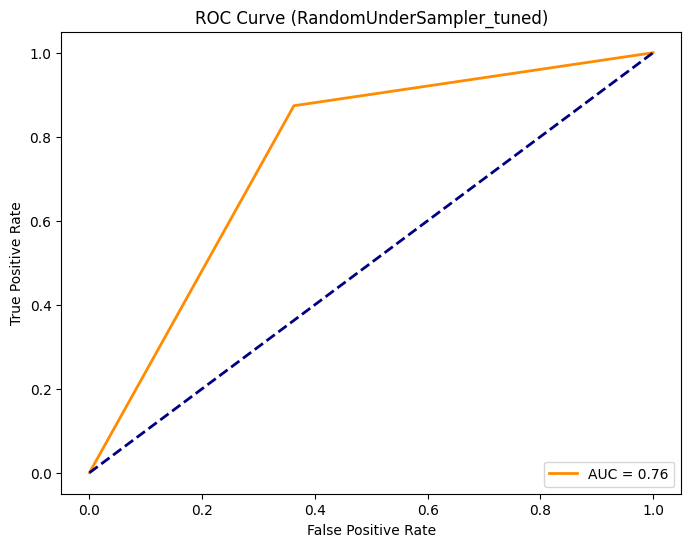

In [64]:
results={}

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann_tuned(X_smote, y_smote, X_test, y_test,'SMOTE_tuned')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann_tuned(X_over, y_over, X_test, y_test,'RandomOverSampler_tuned')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]

In [65]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler_tuned,0.874,0.147,0.252,0.653
RandomOverSampler_tuned,0.786,0.157,0.262,0.704
SMOTE_tuned,0.748,0.163,0.268,0.727


```Apply ANN Tuned model on test data (With Feature Selection)```

In [66]:
# With feature Selection, Best: 0.911606 using {'activation': 'sigmoid', 'batch_size': 32, 
#                                               'dropout_rate': 0.1, 'epochs': 30, 'hidden_units': 8, 
#                                               'learning_rate': 0.001, 'optimizer': 'adam'}
def train_ann_tuned_fs(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(build_fn=ann_rf, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.1, hidden_units=8, learning_rate=0.001, 
                            batch_size=32, epochs=30)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

#### Apply tuned model to training sets 

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.6399 - accuracy: 0.6433
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5655 - accuracy: 0.7203
Epoch 3/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7374
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5243 - accuracy: 0.7451
Epoch 5/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.7510
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5112 - accuracy: 0.7498
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5057 - accuracy: 0.7515
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5020 - accuracy: 0.7531
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4968 - accuracy: 0.7543
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.7529
Epoch 11/3

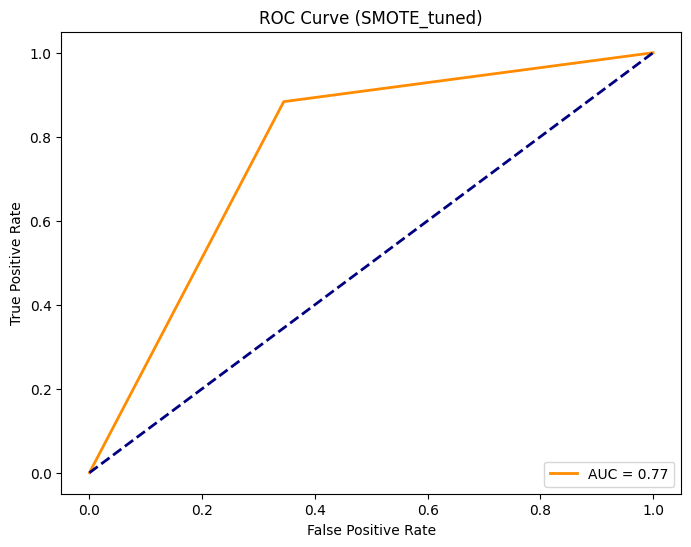

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 1s 1ms/step - loss: 0.6519 - accuracy: 0.6238
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5829 - accuracy: 0.7076
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7256
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7375
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7415
Epoch 6/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5263 - accuracy: 0.7417
Epoch 7/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5226 - accuracy: 0.7402
Epoch 8/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5161 - accuracy: 0.7446
Epoch 9/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5135 - accuracy: 0.7437
Epoch 10/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5106 - accuracy: 0.7436
Epoch 11/3

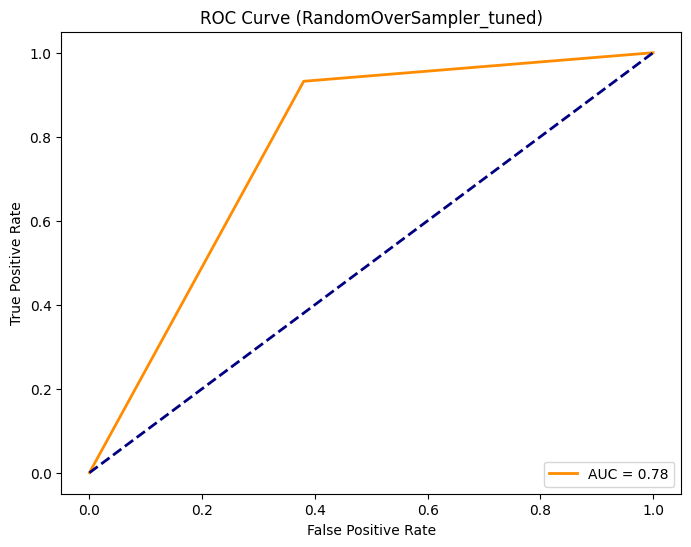

Epoch 1/30


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 1ms/step - loss: 0.7184 - accuracy: 0.5207
Epoch 2/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5580
Epoch 3/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5787
Epoch 4/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5877
Epoch 5/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6640 - accuracy: 0.6153
Epoch 6/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6617 - accuracy: 0.6278
Epoch 7/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6333
Epoch 8/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6547
Epoch 9/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6747
Epoch 10/30
46/46 [==============================] - 0s 1ms/step - loss: 0.6353 - accuracy: 0.6809
Epoch 11/30
46/46 [===========

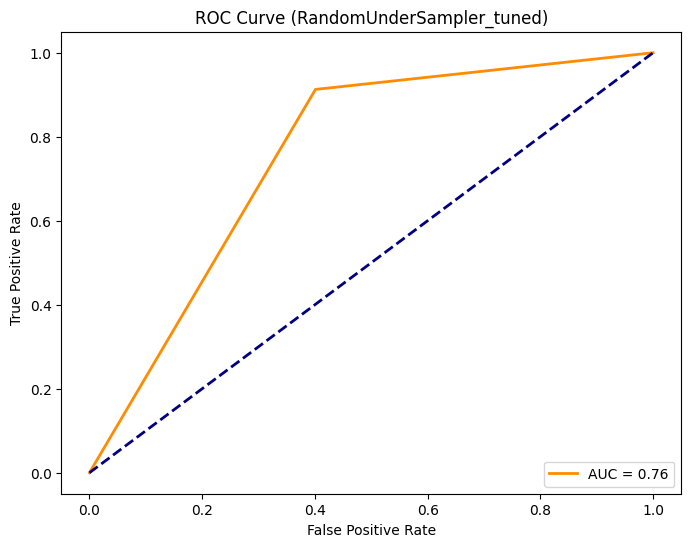

In [67]:
results={}

#smote
X_smote, y_smote = smote(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_smote, y_smote, X_test_rf, y_test,'SMOTE_tuned')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_over, y_over, X_test_rf, y_test,'RandomOverSampler_tuned')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_under, y_under, X_test_rf, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]


In [68]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler_tuned,0.932,0.149,0.257,0.641
RandomUnderSampler_tuned,0.913,0.140,0.243,0.620
SMOTE_tuned,0.883,0.155,0.264,0.671


## Few shot learning

Given the limited amount of positive (fraudulent) data points available, we explored few-shot learning, which is a method that specialises in training with small training data. We implemented a classifier using prototypical networks as the underlying architecture. 

We hypothesized that a few shot classifier would be able to perform comparably to the previous supervised leraning models, while using less samples. To validate this, we will evaluate the classifier's performance on different values of k, where k is the number of examples of each class that is seen by the model during training.

Set up

In [69]:
import warnings

from get_processed_data import get_processed_data
from FSLMethods import form_datasets
from FSLTrainer import FSLTrainer
from show_metrics import show_metrics

warnings.filterwarnings('ignore')

### Preparing data

Train-Test-Validation split

In [70]:
df, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


### Model training (meta-learning / episodic training)

Episodic training simulates the few-shot learning scenario to train a prototypical network. Training data is organized into episodes that resemble few-shot tasks.

Firstly, we determine whether to do feature selection, which method to sample with (if any), and what size the embedding of the prototypical network should be. k is initialized as a constant 10.

In [71]:
config_1 = {
    'n_shot': [10],
    'embedding_size': [2 ** x for x in range(2, 6)] ## Try {4, 8, 16, 32}
}
results_1 = {} ## key:value = (feature_selection, sampling_method):(recall, f1-score)
idx = 0

for feature_selection in [True, False]:
    for sampling_method in ['', 'oversampling', 'undersampling', 'smote']:
        print(f'##### Run {idx} #####')
        print(f'Feature selection: {feature_selection}, sampling method: {sampling_method}')
        train_set, validation_set, test_set = \
            form_datasets(X_train, y_train, X_val, y_val, X_test, y_test, 
                          feature_selection = feature_selection, sampling_method = sampling_method)
        trainer_1 = FSLTrainer(train_set, validation_set, test_set, config_1)

        curr_results, best_config = trainer_1.tune(metric = 'recall')
        print(f'Precision: {curr_results[best_config][0].precision}, F1: {curr_results[best_config][0].f1_score}, AUC: {curr_results[best_config][0].auc}')
        idx += 1
        # print(f'Results: Recall = {curr_results[best_config][0]}, best embedding size = {best_config[1]}')

##### Run 0 #####
Feature selection: True, sampling method: 
Training 10-shot classifier with size 4 embedding... ...
Training 10-shot classifier with size 8 embedding... ...
Training 10-shot classifier with size 16 embedding... ...
Training 10-shot classifier with size 32 embedding... ...
########### Tuning complete ###########
Best trial config: k = 10, embedding size = 4
Best trial validation recall: 0.644
Precision: 0.5902841429880843, F1: 0.615973218555715, AUC: 0.5985
##### Run 1 #####
Feature selection: True, sampling method: oversampling
Training 10-shot classifier with size 4 embedding... ...
Training 10-shot classifier with size 8 embedding... ...
Training 10-shot classifier with size 16 embedding... ...
Training 10-shot classifier with size 32 embedding... ...
########### Tuning complete ###########
Best trial config: k = 10, embedding size = 4
Best trial validation recall: 0.653
Precision: 0.5738137082601055, F1: 0.6108512628624883, AUC: 0.5840000000000001
##### Run 2 #####

From the above results, the best recall was obtained by the model that used feature selection and sampling with SMOTE, and had an embedding size of 8 (ie the feature extractor of the prototypical network embeds inputs into vectors of size 8). We will now experiment with various values of k.

In [72]:
train_set, validation_set, test_set = \
    form_datasets(X_train, y_train, X_val, y_val, X_test, y_test, 
                  feature_selection = True, sampling_method = 'smote')

config_2 = {
    'n_shot': [4 * x for x in range(1, 17)],
    'embedding_size': [8]
}

trainer_2 = FSLTrainer(train_set, validation_set, test_set, config_2)
results, best_config = trainer_2.tune(metric = 'recall') ## Key:Value = (k, embedding_size):(metric, model_params)

Training 4-shot classifier with size 8 embedding... ...
Training 8-shot classifier with size 8 embedding... ...
Training 12-shot classifier with size 8 embedding... ...
Training 16-shot classifier with size 8 embedding... ...
Training 20-shot classifier with size 8 embedding... ...
Training 24-shot classifier with size 8 embedding... ...
Training 28-shot classifier with size 8 embedding... ...
Training 32-shot classifier with size 8 embedding... ...
Training 36-shot classifier with size 8 embedding... ...
Training 40-shot classifier with size 8 embedding... ...
Training 44-shot classifier with size 8 embedding... ...
Training 48-shot classifier with size 8 embedding... ...
Training 52-shot classifier with size 8 embedding... ...
Training 56-shot classifier with size 8 embedding... ...
Training 60-shot classifier with size 8 embedding... ...
Training 64-shot classifier with size 8 embedding... ...
########### Tuning complete ###########
Best trial config: k = 24, embedding size = 8
Best

Thus, we will take the optimal k to be 48, and the optimal embedding size to be 8. 

### Model evaluation

We will now determine the minimum k required to match the performance of the supervised learning models. This is done by evaluating the previously trained models on the testing set. Based on the performance of our other models, a threshold of 0.8 for the recall has been set.

100%|██████████| 100/100 [00:02<00:00, 44.77it/s, f1=0.73, recall=0.82] 


Minimum k required to match performance threshold = 20


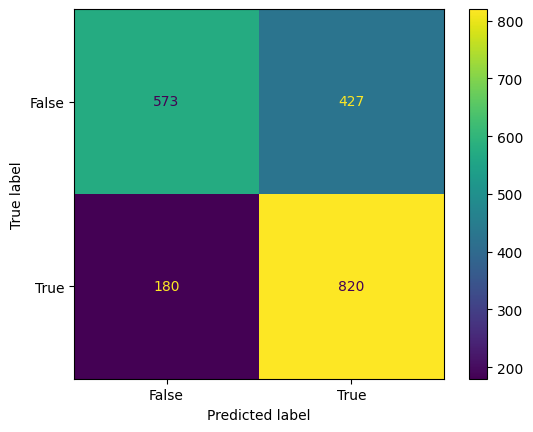

Accuracy: 0.6965
Precision: 0.6575781876503609
Recall: 0.82
Specificity: 0.573
F1_score: 0.7298620382732531


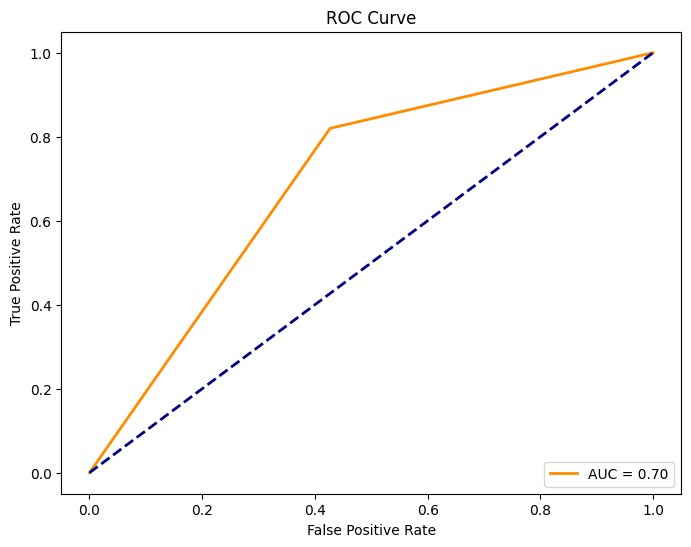

In [73]:
## Get trained models for each k
threshold = 0.8
temp_list = [(k, embedding_size, metric, model_params) for (k, embedding_size), (metric, model_params) in results.items()]
temp_list = sorted(temp_list, key = lambda x: x[0])

relevant_actuals = []
relevant_predictions = []

for curr_k, curr_size, _, curr_params in temp_list:
    curr_config = {
        'n_shot': curr_k,
        'embedding_size': curr_size
    }
    test_metrics = trainer_2.test(curr_params, curr_config)
    if test_metrics.recall > threshold:
        print(f'Minimum k required to match performance threshold = {curr_k}')
        show_metrics(actual = test_metrics.actuals, predicted = test_metrics.predictions, pos_label = 1, neg_label = 0)
        break